In [1]:
pip install pysm3

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np

In [3]:
%matplotlib inline

import numpy as np
import pylab as plt

In [4]:
!pip3 install pygdsm
!pip3 install pygdsm

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import ephem
from scipy.signal import correlate

from scipy.optimize import curve_fit

%matplotlib inline
from pygdsm import GlobalSkyModel


from astropy.timeseries import TimeSeries, BinnedTimeSeries
from astropy.time import Time, TimeDelta
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz, Angle
import astropy.units as u

import pandas as pd
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator

In [5]:
start_time_in_UTC = '2012-05-19 05:45:00'
n_spectra = 1                  #Number of spectra to be taken
delta_t_in_hours = 1            #Time interval between each spectra needed in hours

t = Time(start_time_in_UTC, format = 'iso', scale= 'utc')

ts = TimeSeries(time_start= start_time_in_UTC, time_delta= delta_t_in_hours *u.hour, n_samples= n_spectra)
ts = ts.time
print(ts)

['2012-05-19 05:45:00.000']


In [6]:
import glob
import os
import numpy as np
from scipy import interpolate

'''
## In the rt_file, mention the filename of S11. Please check if it is in linear form. 

rt_file    = 'dipole_correct.txt'
file_list  = sorted(glob.glob(os.path.join(beam_path,"*farfield*.txt")))
#print(file_list)



gamme_file = os.path.join(beam_path, rt_file)

gamma_freq = []
gamma_val  = []

with open(gamme_file) as fa:
    for line_aa in fa.readlines()[2:]:
        line_aa = line_aa.strip()
        col1    = line_aa.split('\t')
        _freq   = np.array(list(map(float, col1[0].split())))[0]
        _val    = np.array(list(map(float, col1[1].split())))[0]
        gamma_freq.append(_freq)
        gamma_val.append(_val)
        
gamma_freq = np.array(gamma_freq)
gamma_val  = np.array(gamma_val)
gamma_val=10**(gamma_val/20)

print(gamma_freq)
print(gamma_val)
gamma_func = interpolate.interp1d(gamma_freq, gamma_val)  '''


## This below print statement is to verify our interpolation. print(gamma_func(any freq value)) 
## and check if it matches the value in the file
#print(gamma_func(2.8))


## The below code is for the beam definition. Please make sure to check the beam_def function before proceeding

'''
phi_res   = 1
theta_res = 1

phi_array   = np.arange(0, 360, phi_res)
theta_array = np.arange(90, -90-theta_res, -theta_res) 
freq_array  = []
file_array  = []

def get_freq_from_file(filename):
    _temp = os.path.basename(filename).replace('.txt','').replace('farfield','').replace('(f=','').replace(')','').replace('[1]','')
    return float(_temp)
    
for ii, file_add in enumerate(file_list):
    freq_array.append(get_freq_from_file(file_add))
    file_array.append(file_add)
    
print(get_freq_from_file('farfield(f=2.608)[1].txt'))
    
np.testing.assert_array_equal(file_array, file_list)

freq_array = np.array(freq_array)
file_array = np.array(file_array)

isort      = np.argsort(freq_array)
freq_array = freq_array[isort]
file_array = file_array[isort]

beam_3D_unnorm = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

'''
'''
for ii, freq in enumerate(freq_array):
    print("Processing frequency {} GHz".format(freq))
    file_add = file_array[ii]
    with open(file_add) as fa:
        for line_aa in fa.readlines()[2:]:
            line_aa = line_aa.strip()
            col1    = line_aa.split('\t')
            all_val = np.array(list(map(float, col1[0].split())))

            theta   = 90-all_val[0] 
            phi     = all_val[1]
            beam    = all_val[2]
            print(theta)
            

            iphi    = np.where(phi_array==phi)[0][0]
            itheta  = np.where(theta_array==theta)[0][0]
            beam_3D_unnorm[ii, itheta, iphi] = 10**(beam/10)
            


beam_3D = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

print(beam_3D_unnorm[0, :,:].shape)


for ifreq in range(beam_3D.shape[0]):
    for itheta in range(beam_3D.shape[1]):
        for iphi in range(beam_3D.shape[2]):
            beam_3D[ifreq, itheta,iphi] = beam_3D_unnorm[ifreq, itheta,iphi]/np.amax(beam_3D_unnorm[ifreq,:,:])


print(freq_array)    

        
theta_array_new = np.flip(theta_array)
phi_array_new   = phi_array
beam_3D_flip=np.flip(beam_3D,axis=1)
print(beam_3D_flip[2,:,0],beam_3D[2,:,0])
from scipy.interpolate import RegularGridInterpolator
my_interpolating_function = RegularGridInterpolator((freq_array, theta_array_new,
                                                     phi_array_new), beam_3D_flip)
print(my_interpolating_function.shape)

'''

## Beam definition
## If only the effect of S11 has to be checked (with ideal antenna beam), use the sin^(theta) beam. 

## Added

#freq = [408, 1420, 23000]
#phi_res   = 1
#theta_res = 1

#az   = np.arange(0, 360, phi_res)
#alt = np.arange(90, -90-theta_res, -theta_res) 

## Added ends

def beam_def(freq, alt, az):
    if (alt<=0):
        return 0
    else:
        return (math.cos(alt*PI/180)*math.sin(alt*PI/180))


    
#plt.plot(gamma_freq, gamma_val)
#plt.xlim([2,4])
#plt.show()

In [7]:
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 2.5                #Check the f_start and f_stop and change the number of channels accordingly
f_stop = 4
No_of_Channels = 251
Channel_width = 1
#N_SIDE = 64
T_hot = 3730
T_cold = 2730                    #T_cold and T_hot in Kelvins
Time_in_UTC = ts
latitude = 13.067439
longitude =80.237617            #Latitude and longitude in degrees
altitude = 0                     #Altitude in meters
alpha = 0.0065                   #Temp. lapse rate (deg C per meter)
PI = 3.14159265
Noise_int_time = 3e+13
Trx = 14
T_atm = 1
frequencies = np.linspace(f_start,f_stop, No_of_Channels, endpoint=True)
CMB_Int = np.empty([No_of_Channels])
P_hot = np.empty(No_of_Channels)
P_cold = np.empty(No_of_Channels)
P_dif = np.empty(No_of_Channels)
cross_real = [0]*No_of_Channels
cross_imag = [0]*No_of_Channels
sumwt = [0]*No_of_Channels
sigma = [0]*No_of_Channels
spectra = [0]*n_spectra
spectra_cross_imag = [0]*n_spectra
#NPIX = hp.nside2npix(N_SIDE)

cross_mix = [0]*No_of_Channels
spectra_real = [0] * n_spectra
spectra_imag = [0] * n_spectra
sigma_real = [0]*No_of_Channels
sigma_imag = [0]*No_of_Channels

#Refraction correction formula
def refraction(alt_in_deg, altitude):
    pres = 1010.*math.pow((1-6.5/288000*altitude),5.255)
    if (altitude>11000):
        temp = 211.5
    else:
        temp = 283.0 - (alpha * altitude)
    R = 1.02/math.tan((alt_in_deg + (10.3/(alt_in_deg + 5.11)))*(PI/180))
    if (alt_in_deg == 90):
        R = R+ 0.0019279
    tpcor = (pres/1000) * (283/temp)
    R =  tpcor*(R/60)
    return alt_in_deg +R



Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location= EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m))
lst = t.sidereal_time('apparent')
print(lst)
#plt.xlabel('Altitutde')
#plt.ylabel('Gain')
#plt.plot(alt[1:180],beam_3D_flip[50,1:180,0]) 
print(beam_def(2.8,-70,0))
print (frequencies)
#print(NPIX)
#plt.plot(beam_3D[100,1:90,0])

# Frequencies between 2600 and 4000
# filtered_indices = np.where((frequencies >= 2.6) & (frequencies <= 4))[0]
# filtered_frequencies = frequencies[filtered_indices]

# print("Filtered frequencies:", filtered_frequencies)
# print("Indices of filtered frequencies:", filtered_indices)


[2h55m09.67251165s]
0
[2.5   2.506 2.512 2.518 2.524 2.53  2.536 2.542 2.548 2.554 2.56  2.566
 2.572 2.578 2.584 2.59  2.596 2.602 2.608 2.614 2.62  2.626 2.632 2.638
 2.644 2.65  2.656 2.662 2.668 2.674 2.68  2.686 2.692 2.698 2.704 2.71
 2.716 2.722 2.728 2.734 2.74  2.746 2.752 2.758 2.764 2.77  2.776 2.782
 2.788 2.794 2.8   2.806 2.812 2.818 2.824 2.83  2.836 2.842 2.848 2.854
 2.86  2.866 2.872 2.878 2.884 2.89  2.896 2.902 2.908 2.914 2.92  2.926
 2.932 2.938 2.944 2.95  2.956 2.962 2.968 2.974 2.98  2.986 2.992 2.998
 3.004 3.01  3.016 3.022 3.028 3.034 3.04  3.046 3.052 3.058 3.064 3.07
 3.076 3.082 3.088 3.094 3.1   3.106 3.112 3.118 3.124 3.13  3.136 3.142
 3.148 3.154 3.16  3.166 3.172 3.178 3.184 3.19  3.196 3.202 3.208 3.214
 3.22  3.226 3.232 3.238 3.244 3.25  3.256 3.262 3.268 3.274 3.28  3.286
 3.292 3.298 3.304 3.31  3.316 3.322 3.328 3.334 3.34  3.346 3.352 3.358
 3.364 3.37  3.376 3.382 3.388 3.394 3.4   3.406 3.412 3.418 3.424 3.43
 3.436 3.442 3.448 3.454 3.46  3

In [31]:
#recomb_path = "."
recomb_path = "/Users/hshishir/Desktop/Theory"

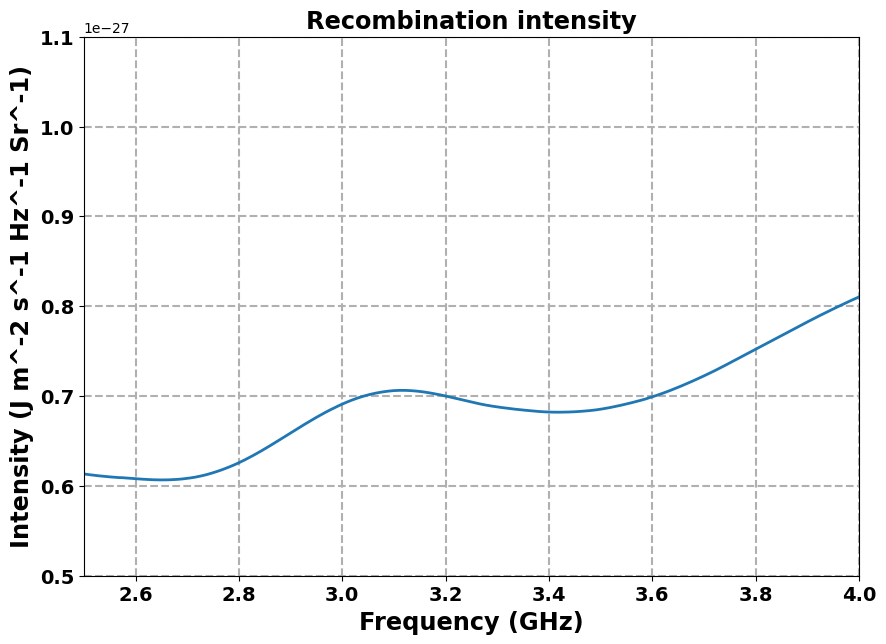

In [32]:
recomb_file = os.path.join(recomb_path,'total_spec_new.txt')
df = pd.read_csv(recomb_file,sep= "    " ,header = None)
df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]

x = df["Frequency"]
y= df["Intensity"]

plt.figure(figsize=(10, 7))
plt.plot((df['Frequency']), (df['Intensity']),linewidth=2)
plt.title('Recombination intensity', fontsize='xx-large', fontweight='bold')
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)', fontsize='xx-large', fontweight='bold')
plt.xlim([f_start,f_stop])
plt.ylim([0.5e-27,1.1e-27])
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()

ius = InterpolatedUnivariateSpline(x, y)
Rec_int = ius(frequencies)

In [33]:
from scipy.interpolate import interp1d

x_new = np.linspace(2.5, 4, 251)

f = interp1d(x, y, kind='linear', fill_value='extrapolate')
y_new = f(x_new)

output_file = os.path.join(recomb_path, 'interpolated_values.txt')
with open(output_file, 'w') as f:
    for freq, inten in zip(x_new, y_new):
        f.write(f"{freq}\t{inten}\n")

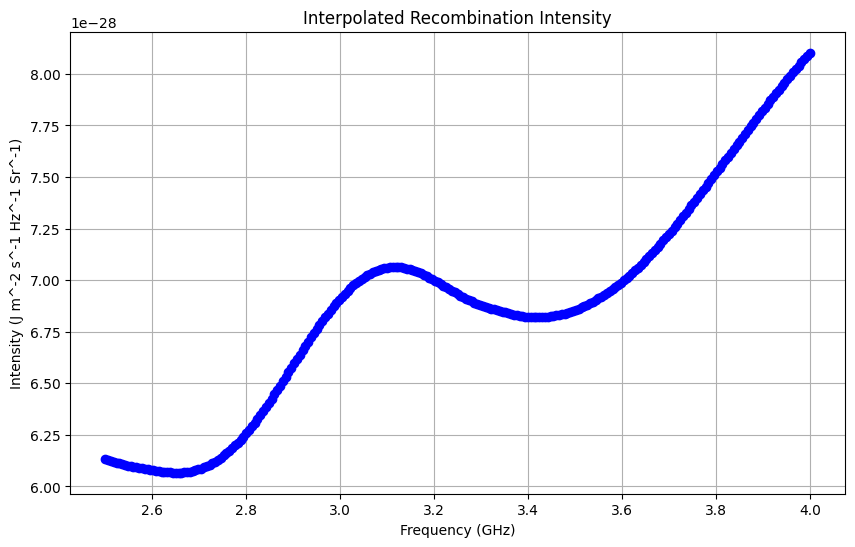

6.933373527067464e-28


In [34]:
file_path = '/Users/hshishir/Desktop/Theory/interpolated_values.txt'

recomb_li = pd.read_csv(file_path, delimiter='\t', header=None)

x = recomb_li[0]
y = recomb_li[1]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)')
plt.title('Interpolated Recombination Intensity')
plt.grid(True)
plt.show()

print(recomb_li.iloc[125,1])

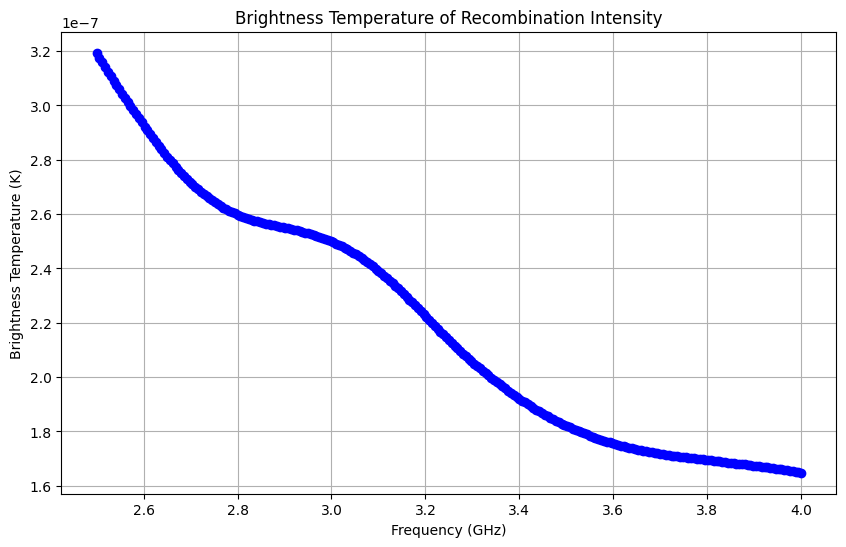

2.1365155910006927e-07


In [36]:
file_path = '/Users/hshishir/Desktop/Theory/interpolated_values.txt'
output_file_path = '/Users/hshishir/Desktop/Theory/brightness_temperature.txt'

recomb_li = pd.read_csv(file_path, delimiter='\t', header=None)

frequencies = recomb_li[0]
intensities = recomb_li[1]

brightness_temps = []

for j in range(251):
    brightness_temp_recomb = (intensities[j] * (c**2)) / (2 * k * 1e+18 * (frequencies[j] ** 2))
    brightness_temps.append((frequencies[j], brightness_temp_recomb))

with open(output_file_path, 'w') as file:
    for freq, temp in brightness_temps:
        file.write(f"{freq}\t{temp}\n")

brightness_temp_data = pd.read_csv(output_file_path, delimiter='\t', header=None)
frequencies_bt = brightness_temp_data[0]
brightness_temps_bt = brightness_temp_data[1]

plt.figure(figsize=(10, 6))
plt.plot(frequencies_bt, brightness_temps_bt, marker='o', linestyle='-', color='b')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Brightness Temperature (K)')
plt.title('Brightness Temperature of Recombination Intensity')
plt.grid(True)
plt.show()

print(brightness_temps_bt[125])

In [13]:
from pygdsm import GlobalSkyModel16
from pygdsm import GlobalSkyModel

In [14]:
CMB_Int = ((2*h*1e+27*frequencies**3)/(c*c))/(np.exp((h*frequencies*1e+9)/(k*TCMB))-1)
print("Got CMB Int!")

#P_hot and P_cold for calibration
P_hot = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_hot))-1)
P_cold = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_cold))-1)
P_dif = P_hot -P_cold

# Output the results for verification
print("CMB_Int:", CMB_Int)
print("P_hot:", P_hot)
print("P_cold:", P_cold)
print("P_dif:", P_dif)

print("Got P_dif for calibration!")

Got CMB Int!
CMB_Int: [5.11918117e-21 5.14350901e-21 5.16789321e-21 5.19233376e-21
 5.21683064e-21 5.24138386e-21 5.26599340e-21 5.29065925e-21
 5.31538140e-21 5.34015985e-21 5.36499458e-21 5.38988558e-21
 5.41483285e-21 5.43983638e-21 5.46489616e-21 5.49001217e-21
 5.51518441e-21 5.54041287e-21 5.56569754e-21 5.59103841e-21
 5.61643547e-21 5.64188871e-21 5.66739813e-21 5.69296371e-21
 5.71858545e-21 5.74426333e-21 5.76999734e-21 5.79578749e-21
 5.82163375e-21 5.84753611e-21 5.87349458e-21 5.89950914e-21
 5.92557978e-21 5.95170648e-21 5.97788925e-21 6.00412808e-21
 6.03042294e-21 6.05677384e-21 6.08318077e-21 6.10964371e-21
 6.13616266e-21 6.16273760e-21 6.18936853e-21 6.21605544e-21
 6.24279832e-21 6.26959716e-21 6.29645195e-21 6.32336269e-21
 6.35032935e-21 6.37735194e-21 6.40443044e-21 6.43156485e-21
 6.45875515e-21 6.48600134e-21 6.51330340e-21 6.54066134e-21
 6.56807513e-21 6.59554477e-21 6.62307025e-21 6.65065156e-21
 6.67828869e-21 6.70598164e-21 6.73373039e-21 6.76153493e-21
 6

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
sky = pysm3.Sky(nside=64, preset_strings=["s1"])

In [17]:
sky.components

In [18]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/I1/fits_file(64)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I1/maps_tx(64)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} GHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_0 = map_2GHz[0]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_0, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} GHz.")

print("All maps have been processed and saved!")


Processing 2.5 GHz...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.5 GHz.
Processing 2.506 GHz...
Completed 2.506 GHz.
Processing 2.512 GHz...
Completed 2.512 GHz.
Processing 2.518 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.518 GHz.
Processing 2.524 GHz...
Completed 2.524 GHz.
Processing 2.53 GHz...
Completed 2.53 GHz.
Processing 2.536 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.536 GHz.
Processing 2.542 GHz...
Completed 2.542 GHz.
Processing 2.548 GHz...
Completed 2.548 GHz.
Processing 2.554 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.554 GHz.
Processing 2.56 GHz...
Completed 2.56 GHz.
Processing 2.566 GHz...
Completed 2.566 GHz.
Processing 2.572 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.572 GHz.
Processing 2.578 GHz...
Completed 2.578 GHz.
Processing 2.584 GHz...
Completed 2.584 GHz.
Processing 2.59 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.59 GHz.
Processing 2.596 GHz...
Completed 2.596 GHz.
Processing 2.602 GHz...
Completed 2.602 GHz.
Processing 2.608 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.608 GHz.
Processing 2.614 GHz...
Completed 2.614 GHz.
Processing 2.62 GHz...
Completed 2.62 GHz.
Processing 2.626 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.626 GHz.
Processing 2.632 GHz...
Completed 2.632 GHz.
Processing 2.638 GHz...
Completed 2.638 GHz.
Processing 2.644 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.644 GHz.
Processing 2.65 GHz...
Completed 2.65 GHz.
Processing 2.656 GHz...
Completed 2.656 GHz.
Processing 2.662 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.662 GHz.
Processing 2.668 GHz...
Completed 2.668 GHz.
Processing 2.674 GHz...
Completed 2.674 GHz.
Processing 2.68 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.68 GHz.
Processing 2.686 GHz...
Completed 2.686 GHz.
Processing 2.692 GHz...
Completed 2.692 GHz.
Processing 2.698 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.698 GHz.
Processing 2.704 GHz...
Completed 2.704 GHz.
Processing 2.71 GHz...
Completed 2.71 GHz.
Processing 2.716 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.716 GHz.
Processing 2.722 GHz...
Completed 2.722 GHz.
Processing 2.728 GHz...
Completed 2.728 GHz.
Processing 2.734 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.734 GHz.
Processing 2.74 GHz...
Completed 2.74 GHz.
Processing 2.746 GHz...
Completed 2.746 GHz.
Processing 2.752 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.752 GHz.
Processing 2.758 GHz...
Completed 2.758 GHz.
Processing 2.7640000000000002 GHz...
Completed 2.7640000000000002 GHz.
Processing 2.77 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.77 GHz.
Processing 2.776 GHz...
Completed 2.776 GHz.
Processing 2.782 GHz...
Completed 2.782 GHz.
Processing 2.7880000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.7880000000000003 GHz.
Processing 2.794 GHz...
Completed 2.794 GHz.
Processing 2.8 GHz...
Completed 2.8 GHz.
Processing 2.806 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.806 GHz.
Processing 2.812 GHz...
Completed 2.812 GHz.
Processing 2.818 GHz...
Completed 2.818 GHz.
Processing 2.824 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.824 GHz.
Processing 2.83 GHz...
Completed 2.83 GHz.
Processing 2.836 GHz...
Completed 2.836 GHz.
Processing 2.842 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.842 GHz.
Processing 2.848 GHz...
Completed 2.848 GHz.
Processing 2.854 GHz...
Completed 2.854 GHz.
Processing 2.86 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.86 GHz.
Processing 2.866 GHz...
Completed 2.866 GHz.
Processing 2.872 GHz...
Completed 2.872 GHz.
Processing 2.878 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.878 GHz.
Processing 2.884 GHz...
Completed 2.884 GHz.
Processing 2.89 GHz...
Completed 2.89 GHz.
Processing 2.896 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.896 GHz.
Processing 2.902 GHz...
Completed 2.902 GHz.
Processing 2.908 GHz...
Completed 2.908 GHz.
Processing 2.914 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.914 GHz.
Processing 2.92 GHz...
Completed 2.92 GHz.
Processing 2.926 GHz...
Completed 2.926 GHz.
Processing 2.932 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.932 GHz.
Processing 2.938 GHz...
Completed 2.938 GHz.
Processing 2.944 GHz...
Completed 2.944 GHz.
Processing 2.95 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.95 GHz.
Processing 2.956 GHz...
Completed 2.956 GHz.
Processing 2.962 GHz...
Completed 2.962 GHz.
Processing 2.968 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.968 GHz.
Processing 2.974 GHz...
Completed 2.974 GHz.
Processing 2.98 GHz...
Completed 2.98 GHz.
Processing 2.9859999999999998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.9859999999999998 GHz.
Processing 2.992 GHz...
Completed 2.992 GHz.
Processing 2.998 GHz...
Completed 2.998 GHz.
Processing 3.004 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.004 GHz.
Processing 3.01 GHz...
Completed 3.01 GHz.
Processing 3.016 GHz...
Completed 3.016 GHz.
Processing 3.0220000000000002 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.0220000000000002 GHz.
Processing 3.028 GHz...
Completed 3.028 GHz.
Processing 3.034 GHz...
Completed 3.034 GHz.
Processing 3.04 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.04 GHz.
Processing 3.0460000000000003 GHz...
Completed 3.0460000000000003 GHz.
Processing 3.052 GHz...
Completed 3.052 GHz.
Processing 3.058 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.058 GHz.
Processing 3.064 GHz...
Completed 3.064 GHz.
Processing 3.0700000000000003 GHz...
Completed 3.0700000000000003 GHz.
Processing 3.076 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.076 GHz.
Processing 3.082 GHz...
Completed 3.082 GHz.
Processing 3.088 GHz...
Completed 3.088 GHz.
Processing 3.094 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.094 GHz.
Processing 3.1 GHz...
Completed 3.1 GHz.
Processing 3.106 GHz...
Completed 3.106 GHz.
Processing 3.112 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.112 GHz.
Processing 3.118 GHz...
Completed 3.118 GHz.
Processing 3.124 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.124 GHz.
Processing 3.13 GHz...
Completed 3.13 GHz.
Processing 3.136 GHz...
Completed 3.136 GHz.
Processing 3.142 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.142 GHz.
Processing 3.148 GHz...
Completed 3.148 GHz.
Processing 3.154 GHz...
Completed 3.154 GHz.
Processing 3.16 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.16 GHz.
Processing 3.166 GHz...
Completed 3.166 GHz.
Processing 3.172 GHz...
Completed 3.172 GHz.
Processing 3.178 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.178 GHz.
Processing 3.184 GHz...
Completed 3.184 GHz.
Processing 3.19 GHz...
Completed 3.19 GHz.
Processing 3.196 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.196 GHz.
Processing 3.202 GHz...
Completed 3.202 GHz.
Processing 3.208 GHz...
Completed 3.208 GHz.
Processing 3.214 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.214 GHz.
Processing 3.2199999999999998 GHz...
Completed 3.2199999999999998 GHz.
Processing 3.226 GHz...
Completed 3.226 GHz.
Processing 3.232 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.232 GHz.
Processing 3.238 GHz...
Completed 3.238 GHz.
Processing 3.2439999999999998 GHz...
Completed 3.2439999999999998 GHz.
Processing 3.25 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.25 GHz.
Processing 3.2560000000000002 GHz...
Completed 3.2560000000000002 GHz.
Processing 3.262 GHz...
Completed 3.262 GHz.
Processing 3.268 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.268 GHz.
Processing 3.274 GHz...
Completed 3.274 GHz.
Processing 3.2800000000000002 GHz...
Completed 3.2800000000000002 GHz.
Processing 3.286 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.286 GHz.
Processing 3.292 GHz...
Completed 3.292 GHz.
Processing 3.298 GHz...
Completed 3.298 GHz.
Processing 3.3040000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.3040000000000003 GHz.
Processing 3.31 GHz...
Completed 3.31 GHz.
Processing 3.316 GHz...
Completed 3.316 GHz.
Processing 3.322 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.322 GHz.
Processing 3.3280000000000003 GHz...
Completed 3.3280000000000003 GHz.
Processing 3.334 GHz...
Completed 3.334 GHz.
Processing 3.34 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.34 GHz.
Processing 3.346 GHz...
Completed 3.346 GHz.
Processing 3.352 GHz...
Completed 3.352 GHz.
Processing 3.358 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.358 GHz.
Processing 3.364 GHz...
Completed 3.364 GHz.
Processing 3.37 GHz...
Completed 3.37 GHz.
Processing 3.376 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.376 GHz.
Processing 3.382 GHz...
Completed 3.382 GHz.
Processing 3.388 GHz...
Completed 3.388 GHz.
Processing 3.394 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.394 GHz.
Processing 3.4 GHz...
Completed 3.4 GHz.
Processing 3.406 GHz...
Completed 3.406 GHz.
Processing 3.412 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.412 GHz.
Processing 3.418 GHz...
Completed 3.418 GHz.
Processing 3.424 GHz...
Completed 3.424 GHz.
Processing 3.43 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.43 GHz.
Processing 3.436 GHz...
Completed 3.436 GHz.
Processing 3.442 GHz...
Completed 3.442 GHz.
Processing 3.448 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.448 GHz.
Processing 3.454 GHz...
Completed 3.454 GHz.
Processing 3.46 GHz...
Completed 3.46 GHz.
Processing 3.466 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.466 GHz.
Processing 3.472 GHz...
Completed 3.472 GHz.
Processing 3.4779999999999998 GHz...
Completed 3.4779999999999998 GHz.
Processing 3.484 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.484 GHz.
Processing 3.49 GHz...
Completed 3.49 GHz.
Processing 3.496 GHz...
Completed 3.496 GHz.
Processing 3.502 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.502 GHz.
Processing 3.508 GHz...
Completed 3.508 GHz.
Processing 3.5140000000000002 GHz...
Completed 3.5140000000000002 GHz.
Processing 3.52 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.52 GHz.
Processing 3.526 GHz...
Completed 3.526 GHz.
Processing 3.532 GHz...
Completed 3.532 GHz.
Processing 3.5380000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.5380000000000003 GHz.
Processing 3.544 GHz...
Completed 3.544 GHz.
Processing 3.55 GHz...
Completed 3.55 GHz.
Processing 3.556 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.556 GHz.
Processing 3.5620000000000003 GHz...
Completed 3.5620000000000003 GHz.
Processing 3.568 GHz...
Completed 3.568 GHz.
Processing 3.574 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.574 GHz.
Processing 3.58 GHz...
Completed 3.58 GHz.
Processing 3.5860000000000003 GHz...
Completed 3.5860000000000003 GHz.
Processing 3.592 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.592 GHz.
Processing 3.598 GHz...
Completed 3.598 GHz.
Processing 3.604 GHz...
Completed 3.604 GHz.
Processing 3.6100000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6100000000000003 GHz.
Processing 3.616 GHz...
Completed 3.616 GHz.
Processing 3.622 GHz...
Completed 3.622 GHz.
Processing 3.628 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.628 GHz.
Processing 3.6340000000000003 GHz...
Completed 3.6340000000000003 GHz.
Processing 3.64 GHz...
Completed 3.64 GHz.
Processing 3.646 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.646 GHz.
Processing 3.652 GHz...
Completed 3.652 GHz.
Processing 3.658 GHz...
Completed 3.658 GHz.
Processing 3.6639999999999997 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6639999999999997 GHz.
Processing 3.67 GHz...
Completed 3.67 GHz.
Processing 3.676 GHz...
Completed 3.676 GHz.
Processing 3.682 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.682 GHz.
Processing 3.6879999999999997 GHz...
Completed 3.6879999999999997 GHz.
Processing 3.694 GHz...
Completed 3.694 GHz.
Processing 3.7 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7 GHz.
Processing 3.706 GHz...
Completed 3.706 GHz.
Processing 3.7119999999999997 GHz...
Completed 3.7119999999999997 GHz.
Processing 3.718 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.718 GHz.
Processing 3.724 GHz...
Completed 3.724 GHz.
Processing 3.73 GHz...
Completed 3.73 GHz.
Processing 3.7359999999999998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7359999999999998 GHz.
Processing 3.742 GHz...
Completed 3.742 GHz.
Processing 3.748 GHz...
Completed 3.748 GHz.
Processing 3.754 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.754 GHz.
Processing 3.76 GHz...
Completed 3.76 GHz.
Processing 3.766 GHz...
Completed 3.766 GHz.
Processing 3.7720000000000002 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7720000000000002 GHz.
Processing 3.778 GHz...
Completed 3.778 GHz.
Processing 3.784 GHz...
Completed 3.784 GHz.
Processing 3.79 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.79 GHz.
Processing 3.7960000000000003 GHz...
Completed 3.7960000000000003 GHz.
Processing 3.802 GHz...
Completed 3.802 GHz.
Processing 3.808 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.808 GHz.
Processing 3.814 GHz...
Completed 3.814 GHz.
Processing 3.8200000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.8200000000000003 GHz.
Processing 3.826 GHz...
Completed 3.826 GHz.
Processing 3.832 GHz...
Completed 3.832 GHz.
Processing 3.838 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.838 GHz.
Processing 3.8440000000000003 GHz...
Completed 3.8440000000000003 GHz.
Processing 3.85 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.85 GHz.
Processing 3.856 GHz...
Completed 3.856 GHz.
Processing 3.862 GHz...
Completed 3.862 GHz.
Processing 3.8680000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.8680000000000003 GHz.
Processing 3.874 GHz...
Completed 3.874 GHz.
Processing 3.88 GHz...
Completed 3.88 GHz.
Processing 3.886 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.886 GHz.
Processing 3.8920000000000003 GHz...
Completed 3.8920000000000003 GHz.
Processing 3.898 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.898 GHz.
Processing 3.904 GHz...
Completed 3.904 GHz.
Processing 3.91 GHz...
Completed 3.91 GHz.
Processing 3.916 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.916 GHz.
Processing 3.9219999999999997 GHz...
Completed 3.9219999999999997 GHz.
Processing 3.928 GHz...
Completed 3.928 GHz.
Processing 3.934 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.934 GHz.
Processing 3.94 GHz...
Completed 3.94 GHz.
Processing 3.9459999999999997 GHz...
Completed 3.9459999999999997 GHz.
Processing 3.952 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.952 GHz.
Processing 3.958 GHz...
Completed 3.958 GHz.
Processing 3.964 GHz...
Completed 3.964 GHz.
Processing 3.9699999999999998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.9699999999999998 GHz.
Processing 3.976 GHz...
Completed 3.976 GHz.
Processing 3.982 GHz...
Completed 3.982 GHz.
Processing 3.988 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.988 GHz.
Processing 3.9939999999999998 GHz...
Completed 3.9939999999999998 GHz.
Processing 4.0 GHz...
Completed 4.0 GHz.
All maps have been processed and saved!


In [19]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q1/fits_file(64)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q1/maps_tx(64)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} GHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_1 = map_2GHz[1]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_1, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} GHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Processing 2.5 GHz...
Completed 2.5 GHz.
Processing 2.506 GHz...
Completed 2.506 GHz.
Processing 2.512 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.512 GHz.
Processing 2.518 GHz...
Completed 2.518 GHz.
Processing 2.524 GHz...
Completed 2.524 GHz.
Processing 2.53 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.53 GHz.
Processing 2.536 GHz...
Completed 2.536 GHz.
Processing 2.542 GHz...
Completed 2.542 GHz.
Processing 2.548 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.548 GHz.
Processing 2.554 GHz...
Completed 2.554 GHz.
Processing 2.56 GHz...
Completed 2.56 GHz.
Processing 2.566 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.566 GHz.
Processing 2.572 GHz...
Completed 2.572 GHz.
Processing 2.578 GHz...
Completed 2.578 GHz.
Processing 2.584 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.584 GHz.
Processing 2.59 GHz...
Completed 2.59 GHz.
Processing 2.596 GHz...
Completed 2.596 GHz.
Processing 2.602 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.602 GHz.
Processing 2.608 GHz...
Completed 2.608 GHz.
Processing 2.614 GHz...
Completed 2.614 GHz.
Processing 2.62 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.62 GHz.
Processing 2.626 GHz...
Completed 2.626 GHz.
Processing 2.632 GHz...
Completed 2.632 GHz.
Processing 2.638 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.638 GHz.
Processing 2.644 GHz...
Completed 2.644 GHz.
Processing 2.65 GHz...
Completed 2.65 GHz.
Processing 2.656 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.656 GHz.
Processing 2.662 GHz...
Completed 2.662 GHz.
Processing 2.668 GHz...
Completed 2.668 GHz.
Processing 2.674 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.674 GHz.
Processing 2.68 GHz...
Completed 2.68 GHz.
Processing 2.686 GHz...
Completed 2.686 GHz.
Processing 2.692 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.692 GHz.
Processing 2.698 GHz...
Completed 2.698 GHz.
Processing 2.704 GHz...
Completed 2.704 GHz.
Processing 2.71 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.71 GHz.
Processing 2.716 GHz...
Completed 2.716 GHz.
Processing 2.722 GHz...
Completed 2.722 GHz.
Processing 2.728 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.728 GHz.
Processing 2.734 GHz...
Completed 2.734 GHz.
Processing 2.74 GHz...
Completed 2.74 GHz.
Processing 2.746 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.746 GHz.
Processing 2.752 GHz...
Completed 2.752 GHz.
Processing 2.758 GHz...
Completed 2.758 GHz.
Processing 2.7640000000000002 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.7640000000000002 GHz.
Processing 2.77 GHz...
Completed 2.77 GHz.
Processing 2.776 GHz...
Completed 2.776 GHz.
Processing 2.782 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.782 GHz.
Processing 2.7880000000000003 GHz...
Completed 2.7880000000000003 GHz.
Processing 2.794 GHz...
Completed 2.794 GHz.
Processing 2.8 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.8 GHz.
Processing 2.806 GHz...
Completed 2.806 GHz.
Processing 2.812 GHz...
Completed 2.812 GHz.
Processing 2.818 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.818 GHz.
Processing 2.824 GHz...
Completed 2.824 GHz.
Processing 2.83 GHz...
Completed 2.83 GHz.
Processing 2.836 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.836 GHz.
Processing 2.842 GHz...
Completed 2.842 GHz.
Processing 2.848 GHz...
Completed 2.848 GHz.
Processing 2.854 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.854 GHz.
Processing 2.86 GHz...
Completed 2.86 GHz.
Processing 2.866 GHz...
Completed 2.866 GHz.
Processing 2.872 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.872 GHz.
Processing 2.878 GHz...
Completed 2.878 GHz.
Processing 2.884 GHz...
Completed 2.884 GHz.
Processing 2.89 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.89 GHz.
Processing 2.896 GHz...
Completed 2.896 GHz.
Processing 2.902 GHz...
Completed 2.902 GHz.
Processing 2.908 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.908 GHz.
Processing 2.914 GHz...
Completed 2.914 GHz.
Processing 2.92 GHz...
Completed 2.92 GHz.
Processing 2.926 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.926 GHz.
Processing 2.932 GHz...
Completed 2.932 GHz.
Processing 2.938 GHz...
Completed 2.938 GHz.
Processing 2.944 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.944 GHz.
Processing 2.95 GHz...
Completed 2.95 GHz.
Processing 2.956 GHz...
Completed 2.956 GHz.
Processing 2.962 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.962 GHz.
Processing 2.968 GHz...
Completed 2.968 GHz.
Processing 2.974 GHz...
Completed 2.974 GHz.
Processing 2.98 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.98 GHz.
Processing 2.9859999999999998 GHz...
Completed 2.9859999999999998 GHz.
Processing 2.992 GHz...
Completed 2.992 GHz.
Processing 2.998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.998 GHz.
Processing 3.004 GHz...
Completed 3.004 GHz.
Processing 3.01 GHz...
Completed 3.01 GHz.
Processing 3.016 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.016 GHz.
Processing 3.0220000000000002 GHz...
Completed 3.0220000000000002 GHz.
Processing 3.028 GHz...
Completed 3.028 GHz.
Processing 3.034 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.034 GHz.
Processing 3.04 GHz...
Completed 3.04 GHz.
Processing 3.0460000000000003 GHz...
Completed 3.0460000000000003 GHz.
Processing 3.052 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.052 GHz.
Processing 3.058 GHz...
Completed 3.058 GHz.
Processing 3.064 GHz...
Completed 3.064 GHz.
Processing 3.0700000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.0700000000000003 GHz.
Processing 3.076 GHz...
Completed 3.076 GHz.
Processing 3.082 GHz...
Completed 3.082 GHz.
Processing 3.088 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.088 GHz.
Processing 3.094 GHz...
Completed 3.094 GHz.
Processing 3.1 GHz...
Completed 3.1 GHz.
Processing 3.106 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.106 GHz.
Processing 3.112 GHz...
Completed 3.112 GHz.
Processing 3.118 GHz...
Completed 3.118 GHz.
Processing 3.124 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.124 GHz.
Processing 3.13 GHz...
Completed 3.13 GHz.
Processing 3.136 GHz...
Completed 3.136 GHz.
Processing 3.142 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.142 GHz.
Processing 3.148 GHz...
Completed 3.148 GHz.
Processing 3.154 GHz...
Completed 3.154 GHz.
Processing 3.16 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.16 GHz.
Processing 3.166 GHz...
Completed 3.166 GHz.
Processing 3.172 GHz...
Completed 3.172 GHz.
Processing 3.178 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.178 GHz.
Processing 3.184 GHz...
Completed 3.184 GHz.
Processing 3.19 GHz...
Completed 3.19 GHz.
Processing 3.196 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.196 GHz.
Processing 3.202 GHz...
Completed 3.202 GHz.
Processing 3.208 GHz...
Completed 3.208 GHz.
Processing 3.214 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.214 GHz.
Processing 3.2199999999999998 GHz...
Completed 3.2199999999999998 GHz.
Processing 3.226 GHz...
Completed 3.226 GHz.
Processing 3.232 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.232 GHz.
Processing 3.238 GHz...
Completed 3.238 GHz.
Processing 3.2439999999999998 GHz...
Completed 3.2439999999999998 GHz.
Processing 3.25 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.25 GHz.
Processing 3.2560000000000002 GHz...
Completed 3.2560000000000002 GHz.
Processing 3.262 GHz...
Completed 3.262 GHz.
Processing 3.268 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.268 GHz.
Processing 3.274 GHz...
Completed 3.274 GHz.
Processing 3.2800000000000002 GHz...
Completed 3.2800000000000002 GHz.
Processing 3.286 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.286 GHz.
Processing 3.292 GHz...
Completed 3.292 GHz.
Processing 3.298 GHz...
Completed 3.298 GHz.
Processing 3.3040000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.3040000000000003 GHz.
Processing 3.31 GHz...
Completed 3.31 GHz.
Processing 3.316 GHz...
Completed 3.316 GHz.
Processing 3.322 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.322 GHz.
Processing 3.3280000000000003 GHz...
Completed 3.3280000000000003 GHz.
Processing 3.334 GHz...
Completed 3.334 GHz.
Processing 3.34 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.34 GHz.
Processing 3.346 GHz...
Completed 3.346 GHz.
Processing 3.352 GHz...
Completed 3.352 GHz.
Processing 3.358 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.358 GHz.
Processing 3.364 GHz...
Completed 3.364 GHz.
Processing 3.37 GHz...
Completed 3.37 GHz.
Processing 3.376 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.376 GHz.
Processing 3.382 GHz...
Completed 3.382 GHz.
Processing 3.388 GHz...
Completed 3.388 GHz.
Processing 3.394 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.394 GHz.
Processing 3.4 GHz...
Completed 3.4 GHz.
Processing 3.406 GHz...
Completed 3.406 GHz.
Processing 3.412 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.412 GHz.
Processing 3.418 GHz...
Completed 3.418 GHz.
Processing 3.424 GHz...
Completed 3.424 GHz.
Processing 3.43 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.43 GHz.
Processing 3.436 GHz...
Completed 3.436 GHz.
Processing 3.442 GHz...
Completed 3.442 GHz.
Processing 3.448 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.448 GHz.
Processing 3.454 GHz...
Completed 3.454 GHz.
Processing 3.46 GHz...
Completed 3.46 GHz.
Processing 3.466 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.466 GHz.
Processing 3.472 GHz...
Completed 3.472 GHz.
Processing 3.4779999999999998 GHz...
Completed 3.4779999999999998 GHz.
Processing 3.484 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.484 GHz.
Processing 3.49 GHz...
Completed 3.49 GHz.
Processing 3.496 GHz...
Completed 3.496 GHz.
Processing 3.502 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.502 GHz.
Processing 3.508 GHz...
Completed 3.508 GHz.
Processing 3.5140000000000002 GHz...
Completed 3.5140000000000002 GHz.
Processing 3.52 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.52 GHz.
Processing 3.526 GHz...
Completed 3.526 GHz.
Processing 3.532 GHz...
Completed 3.532 GHz.
Processing 3.5380000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.5380000000000003 GHz.
Processing 3.544 GHz...
Completed 3.544 GHz.
Processing 3.55 GHz...
Completed 3.55 GHz.
Processing 3.556 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.556 GHz.
Processing 3.5620000000000003 GHz...
Completed 3.5620000000000003 GHz.
Processing 3.568 GHz...
Completed 3.568 GHz.
Processing 3.574 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.574 GHz.
Processing 3.58 GHz...
Completed 3.58 GHz.
Processing 3.5860000000000003 GHz...
Completed 3.5860000000000003 GHz.
Processing 3.592 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.592 GHz.
Processing 3.598 GHz...
Completed 3.598 GHz.
Processing 3.604 GHz...
Completed 3.604 GHz.
Processing 3.6100000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6100000000000003 GHz.
Processing 3.616 GHz...
Completed 3.616 GHz.
Processing 3.622 GHz...
Completed 3.622 GHz.
Processing 3.628 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.628 GHz.
Processing 3.6340000000000003 GHz...
Completed 3.6340000000000003 GHz.
Processing 3.64 GHz...
Completed 3.64 GHz.
Processing 3.646 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.646 GHz.
Processing 3.652 GHz...
Completed 3.652 GHz.
Processing 3.658 GHz...
Completed 3.658 GHz.
Processing 3.6639999999999997 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6639999999999997 GHz.
Processing 3.67 GHz...
Completed 3.67 GHz.
Processing 3.676 GHz...
Completed 3.676 GHz.
Processing 3.682 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.682 GHz.
Processing 3.6879999999999997 GHz...
Completed 3.6879999999999997 GHz.
Processing 3.694 GHz...
Completed 3.694 GHz.
Processing 3.7 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7 GHz.
Processing 3.706 GHz...
Completed 3.706 GHz.
Processing 3.7119999999999997 GHz...
Completed 3.7119999999999997 GHz.
Processing 3.718 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.718 GHz.
Processing 3.724 GHz...
Completed 3.724 GHz.
Processing 3.73 GHz...
Completed 3.73 GHz.
Processing 3.7359999999999998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7359999999999998 GHz.
Processing 3.742 GHz...
Completed 3.742 GHz.
Processing 3.748 GHz...
Completed 3.748 GHz.
Processing 3.754 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.754 GHz.
Processing 3.76 GHz...
Completed 3.76 GHz.
Processing 3.766 GHz...
Completed 3.766 GHz.
Processing 3.7720000000000002 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7720000000000002 GHz.
Processing 3.778 GHz...
Completed 3.778 GHz.
Processing 3.784 GHz...
Completed 3.784 GHz.
Processing 3.79 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.79 GHz.
Processing 3.7960000000000003 GHz...
Completed 3.7960000000000003 GHz.
Processing 3.802 GHz...
Completed 3.802 GHz.
Processing 3.808 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.808 GHz.
Processing 3.814 GHz...
Completed 3.814 GHz.
Processing 3.8200000000000003 GHz...
Completed 3.8200000000000003 GHz.
Processing 3.826 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.826 GHz.
Processing 3.832 GHz...
Completed 3.832 GHz.
Processing 3.838 GHz...
Completed 3.838 GHz.
Processing 3.8440000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.8440000000000003 GHz.
Processing 3.85 GHz...
Completed 3.85 GHz.
Processing 3.856 GHz...
Completed 3.856 GHz.
Processing 3.862 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.862 GHz.
Processing 3.8680000000000003 GHz...
Completed 3.8680000000000003 GHz.
Processing 3.874 GHz...
Completed 3.874 GHz.
Processing 3.88 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.88 GHz.
Processing 3.886 GHz...
Completed 3.886 GHz.
Processing 3.8920000000000003 GHz...
Completed 3.8920000000000003 GHz.
Processing 3.898 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.898 GHz.
Processing 3.904 GHz...
Completed 3.904 GHz.
Processing 3.91 GHz...
Completed 3.91 GHz.
Processing 3.916 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.916 GHz.
Processing 3.9219999999999997 GHz...
Completed 3.9219999999999997 GHz.
Processing 3.928 GHz...
Completed 3.928 GHz.
Processing 3.934 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.934 GHz.
Processing 3.94 GHz...
Completed 3.94 GHz.
Processing 3.9459999999999997 GHz...
Completed 3.9459999999999997 GHz.
Processing 3.952 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.952 GHz.
Processing 3.958 GHz...
Completed 3.958 GHz.
Processing 3.964 GHz...
Completed 3.964 GHz.
Processing 3.9699999999999998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.9699999999999998 GHz.
Processing 3.976 GHz...
Completed 3.976 GHz.
Processing 3.982 GHz...
Completed 3.982 GHz.
Processing 3.988 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.988 GHz.
Processing 3.9939999999999998 GHz...
Completed 3.9939999999999998 GHz.
Processing 4.0 GHz...
Completed 4.0 GHz.
All maps have been processed and saved!


In [20]:
gsm_2016 = GlobalSkyModel16()

fits_output_dir = "/Users/hshishir/Desktop/polarization_maps/U1/fits_file(64)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/U1/maps_tx(64)"

os.makedirs(fits_output_dir, exist_ok=True)
os.makedirs(txt_output_dir, exist_ok=True)

for freq in frequencies:
    print(f"Processing {freq} GHz...")

    map_2GHz = sky.get_emission(freq * u.GHz)
    map_2GHz_2 = map_2GHz[2]

    # Save the map as a FITS file
    fits_file_path = os.path.join(fits_output_dir, f"map_{freq}.fits")
    hp.write_map(fits_file_path, map_2GHz_2, overwrite=True)

    # Read the map from the FITS file (to ensure compatibility)
    sky_map_tx = hp.read_map(fits_file_path)

    # Save the map as a text file
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    np.savetxt(txt_file_path, sky_map_tx)

    print(f"Completed {freq} GHz.")

print("All maps have been processed and saved!")


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Processing 2.5 GHz...
Completed 2.5 GHz.
Processing 2.506 GHz...
Completed 2.506 GHz.
Processing 2.512 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.512 GHz.
Processing 2.518 GHz...
Completed 2.518 GHz.
Processing 2.524 GHz...
Completed 2.524 GHz.
Processing 2.53 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.53 GHz.
Processing 2.536 GHz...
Completed 2.536 GHz.
Processing 2.542 GHz...
Completed 2.542 GHz.
Processing 2.548 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.548 GHz.
Processing 2.554 GHz...
Completed 2.554 GHz.
Processing 2.56 GHz...
Completed 2.56 GHz.
Processing 2.566 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.566 GHz.
Processing 2.572 GHz...
Completed 2.572 GHz.
Processing 2.578 GHz...
Completed 2.578 GHz.
Processing 2.584 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.584 GHz.
Processing 2.59 GHz...
Completed 2.59 GHz.
Processing 2.596 GHz...
Completed 2.596 GHz.
Processing 2.602 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.602 GHz.
Processing 2.608 GHz...
Completed 2.608 GHz.
Processing 2.614 GHz...
Completed 2.614 GHz.
Processing 2.62 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.62 GHz.
Processing 2.626 GHz...
Completed 2.626 GHz.
Processing 2.632 GHz...
Completed 2.632 GHz.
Processing 2.638 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.638 GHz.
Processing 2.644 GHz...
Completed 2.644 GHz.
Processing 2.65 GHz...
Completed 2.65 GHz.
Processing 2.656 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.656 GHz.
Processing 2.662 GHz...
Completed 2.662 GHz.
Processing 2.668 GHz...
Completed 2.668 GHz.
Processing 2.674 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.674 GHz.
Processing 2.68 GHz...
Completed 2.68 GHz.
Processing 2.686 GHz...
Completed 2.686 GHz.
Processing 2.692 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.692 GHz.
Processing 2.698 GHz...
Completed 2.698 GHz.
Processing 2.704 GHz...
Completed 2.704 GHz.
Processing 2.71 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.71 GHz.
Processing 2.716 GHz...
Completed 2.716 GHz.
Processing 2.722 GHz...
Completed 2.722 GHz.
Processing 2.728 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.728 GHz.
Processing 2.734 GHz...
Completed 2.734 GHz.
Processing 2.74 GHz...
Completed 2.74 GHz.
Processing 2.746 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.746 GHz.
Processing 2.752 GHz...
Completed 2.752 GHz.
Processing 2.758 GHz...
Completed 2.758 GHz.
Processing 2.7640000000000002 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.7640000000000002 GHz.
Processing 2.77 GHz...
Completed 2.77 GHz.
Processing 2.776 GHz...
Completed 2.776 GHz.
Processing 2.782 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.782 GHz.
Processing 2.7880000000000003 GHz...
Completed 2.7880000000000003 GHz.
Processing 2.794 GHz...
Completed 2.794 GHz.
Processing 2.8 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.8 GHz.
Processing 2.806 GHz...
Completed 2.806 GHz.
Processing 2.812 GHz...
Completed 2.812 GHz.
Processing 2.818 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.818 GHz.
Processing 2.824 GHz...
Completed 2.824 GHz.
Processing 2.83 GHz...
Completed 2.83 GHz.
Processing 2.836 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.836 GHz.
Processing 2.842 GHz...
Completed 2.842 GHz.
Processing 2.848 GHz...
Completed 2.848 GHz.
Processing 2.854 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.854 GHz.
Processing 2.86 GHz...
Completed 2.86 GHz.
Processing 2.866 GHz...
Completed 2.866 GHz.
Processing 2.872 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.872 GHz.
Processing 2.878 GHz...
Completed 2.878 GHz.
Processing 2.884 GHz...
Completed 2.884 GHz.
Processing 2.89 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.89 GHz.
Processing 2.896 GHz...
Completed 2.896 GHz.
Processing 2.902 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.902 GHz.
Processing 2.908 GHz...
Completed 2.908 GHz.
Processing 2.914 GHz...
Completed 2.914 GHz.
Processing 2.92 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.92 GHz.
Processing 2.926 GHz...
Completed 2.926 GHz.
Processing 2.932 GHz...
Completed 2.932 GHz.
Processing 2.938 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.938 GHz.
Processing 2.944 GHz...
Completed 2.944 GHz.
Processing 2.95 GHz...
Completed 2.95 GHz.
Processing 2.956 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.956 GHz.
Processing 2.962 GHz...
Completed 2.962 GHz.
Processing 2.968 GHz...
Completed 2.968 GHz.
Processing 2.974 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.974 GHz.
Processing 2.98 GHz...
Completed 2.98 GHz.
Processing 2.9859999999999998 GHz...
Completed 2.9859999999999998 GHz.
Processing 2.992 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 2.992 GHz.
Processing 2.998 GHz...
Completed 2.998 GHz.
Processing 3.004 GHz...
Completed 3.004 GHz.
Processing 3.01 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.01 GHz.
Processing 3.016 GHz...
Completed 3.016 GHz.
Processing 3.0220000000000002 GHz...
Completed 3.0220000000000002 GHz.
Processing 3.028 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.028 GHz.
Processing 3.034 GHz...
Completed 3.034 GHz.
Processing 3.04 GHz...
Completed 3.04 GHz.
Processing 3.0460000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.0460000000000003 GHz.
Processing 3.052 GHz...
Completed 3.052 GHz.
Processing 3.058 GHz...
Completed 3.058 GHz.
Processing 3.064 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.064 GHz.
Processing 3.0700000000000003 GHz...
Completed 3.0700000000000003 GHz.
Processing 3.076 GHz...
Completed 3.076 GHz.
Processing 3.082 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.082 GHz.
Processing 3.088 GHz...
Completed 3.088 GHz.
Processing 3.094 GHz...
Completed 3.094 GHz.
Processing 3.1 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.1 GHz.
Processing 3.106 GHz...
Completed 3.106 GHz.
Processing 3.112 GHz...
Completed 3.112 GHz.
Processing 3.118 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.118 GHz.
Processing 3.124 GHz...
Completed 3.124 GHz.
Processing 3.13 GHz...
Completed 3.13 GHz.
Processing 3.136 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.136 GHz.
Processing 3.142 GHz...
Completed 3.142 GHz.
Processing 3.148 GHz...
Completed 3.148 GHz.
Processing 3.154 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.154 GHz.
Processing 3.16 GHz...
Completed 3.16 GHz.
Processing 3.166 GHz...
Completed 3.166 GHz.
Processing 3.172 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.172 GHz.
Processing 3.178 GHz...
Completed 3.178 GHz.
Processing 3.184 GHz...
Completed 3.184 GHz.
Processing 3.19 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.19 GHz.
Processing 3.196 GHz...
Completed 3.196 GHz.
Processing 3.202 GHz...
Completed 3.202 GHz.
Processing 3.208 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.208 GHz.
Processing 3.214 GHz...
Completed 3.214 GHz.
Processing 3.2199999999999998 GHz...
Completed 3.2199999999999998 GHz.
Processing 3.226 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.226 GHz.
Processing 3.232 GHz...
Completed 3.232 GHz.
Processing 3.238 GHz...
Completed 3.238 GHz.
Processing 3.2439999999999998 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.2439999999999998 GHz.
Processing 3.25 GHz...
Completed 3.25 GHz.
Processing 3.2560000000000002 GHz...
Completed 3.2560000000000002 GHz.
Processing 3.262 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.262 GHz.
Processing 3.268 GHz...
Completed 3.268 GHz.
Processing 3.274 GHz...
Completed 3.274 GHz.
Processing 3.2800000000000002 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.2800000000000002 GHz.
Processing 3.286 GHz...
Completed 3.286 GHz.
Processing 3.292 GHz...
Completed 3.292 GHz.
Processing 3.298 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.298 GHz.
Processing 3.3040000000000003 GHz...
Completed 3.3040000000000003 GHz.
Processing 3.31 GHz...
Completed 3.31 GHz.
Processing 3.316 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.316 GHz.
Processing 3.322 GHz...
Completed 3.322 GHz.
Processing 3.3280000000000003 GHz...
Completed 3.3280000000000003 GHz.
Processing 3.334 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.334 GHz.
Processing 3.34 GHz...
Completed 3.34 GHz.
Processing 3.346 GHz...
Completed 3.346 GHz.
Processing 3.352 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.352 GHz.
Processing 3.358 GHz...
Completed 3.358 GHz.
Processing 3.364 GHz...
Completed 3.364 GHz.
Processing 3.37 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.37 GHz.
Processing 3.376 GHz...
Completed 3.376 GHz.
Processing 3.382 GHz...
Completed 3.382 GHz.
Processing 3.388 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.388 GHz.
Processing 3.394 GHz...
Completed 3.394 GHz.
Processing 3.4 GHz...
Completed 3.4 GHz.
Processing 3.406 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.406 GHz.
Processing 3.412 GHz...
Completed 3.412 GHz.
Processing 3.418 GHz...
Completed 3.418 GHz.
Processing 3.424 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.424 GHz.
Processing 3.43 GHz...
Completed 3.43 GHz.
Processing 3.436 GHz...
Completed 3.436 GHz.
Processing 3.442 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.442 GHz.
Processing 3.448 GHz...
Completed 3.448 GHz.
Processing 3.454 GHz...
Completed 3.454 GHz.
Processing 3.46 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.46 GHz.
Processing 3.466 GHz...
Completed 3.466 GHz.
Processing 3.472 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.472 GHz.
Processing 3.4779999999999998 GHz...
Completed 3.4779999999999998 GHz.
Processing 3.484 GHz...
Completed 3.484 GHz.
Processing 3.49 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.49 GHz.
Processing 3.496 GHz...
Completed 3.496 GHz.
Processing 3.502 GHz...
Completed 3.502 GHz.
Processing 3.508 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.508 GHz.
Processing 3.5140000000000002 GHz...
Completed 3.5140000000000002 GHz.
Processing 3.52 GHz...
Completed 3.52 GHz.
Processing 3.526 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.526 GHz.
Processing 3.532 GHz...
Completed 3.532 GHz.
Processing 3.5380000000000003 GHz...
Completed 3.5380000000000003 GHz.
Processing 3.544 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.544 GHz.
Processing 3.55 GHz...
Completed 3.55 GHz.
Processing 3.556 GHz...
Completed 3.556 GHz.
Processing 3.5620000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.5620000000000003 GHz.
Processing 3.568 GHz...
Completed 3.568 GHz.
Processing 3.574 GHz...
Completed 3.574 GHz.
Processing 3.58 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.58 GHz.
Processing 3.5860000000000003 GHz...
Completed 3.5860000000000003 GHz.
Processing 3.592 GHz...
Completed 3.592 GHz.
Processing 3.598 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.598 GHz.
Processing 3.604 GHz...
Completed 3.604 GHz.
Processing 3.6100000000000003 GHz...
Completed 3.6100000000000003 GHz.
Processing 3.616 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.616 GHz.
Processing 3.622 GHz...
Completed 3.622 GHz.
Processing 3.628 GHz...
Completed 3.628 GHz.
Processing 3.6340000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6340000000000003 GHz.
Processing 3.64 GHz...
Completed 3.64 GHz.
Processing 3.646 GHz...
Completed 3.646 GHz.
Processing 3.652 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.652 GHz.
Processing 3.658 GHz...
Completed 3.658 GHz.
Processing 3.6639999999999997 GHz...
Completed 3.6639999999999997 GHz.
Processing 3.67 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.67 GHz.
Processing 3.676 GHz...
Completed 3.676 GHz.
Processing 3.682 GHz...
Completed 3.682 GHz.
Processing 3.6879999999999997 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.6879999999999997 GHz.
Processing 3.694 GHz...
Completed 3.694 GHz.
Processing 3.7 GHz...
Completed 3.7 GHz.
Processing 3.706 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.706 GHz.
Processing 3.7119999999999997 GHz...
Completed 3.7119999999999997 GHz.
Processing 3.718 GHz...
Completed 3.718 GHz.
Processing 3.724 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.724 GHz.
Processing 3.73 GHz...
Completed 3.73 GHz.
Processing 3.7359999999999998 GHz...
Completed 3.7359999999999998 GHz.
Processing 3.742 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.742 GHz.
Processing 3.748 GHz...
Completed 3.748 GHz.
Processing 3.754 GHz...
Completed 3.754 GHz.
Processing 3.76 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.76 GHz.
Processing 3.766 GHz...
Completed 3.766 GHz.
Processing 3.7720000000000002 GHz...
Completed 3.7720000000000002 GHz.
Processing 3.778 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.778 GHz.
Processing 3.784 GHz...
Completed 3.784 GHz.
Processing 3.79 GHz...
Completed 3.79 GHz.
Processing 3.7960000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.7960000000000003 GHz.
Processing 3.802 GHz...
Completed 3.802 GHz.
Processing 3.808 GHz...
Completed 3.808 GHz.
Processing 3.814 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.814 GHz.
Processing 3.8200000000000003 GHz...
Completed 3.8200000000000003 GHz.
Processing 3.826 GHz...
Completed 3.826 GHz.
Processing 3.832 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.832 GHz.
Processing 3.838 GHz...
Completed 3.838 GHz.
Processing 3.8440000000000003 GHz...
Completed 3.8440000000000003 GHz.
Processing 3.85 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.85 GHz.
Processing 3.856 GHz...
Completed 3.856 GHz.
Processing 3.862 GHz...
Completed 3.862 GHz.
Processing 3.8680000000000003 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.8680000000000003 GHz.
Processing 3.874 GHz...
Completed 3.874 GHz.
Processing 3.88 GHz...
Completed 3.88 GHz.
Processing 3.886 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.886 GHz.
Processing 3.8920000000000003 GHz...
Completed 3.8920000000000003 GHz.
Processing 3.898 GHz...
Completed 3.898 GHz.
Processing 3.904 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.904 GHz.
Processing 3.91 GHz...
Completed 3.91 GHz.
Processing 3.916 GHz...
Completed 3.916 GHz.
Processing 3.9219999999999997 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.9219999999999997 GHz.
Processing 3.928 GHz...
Completed 3.928 GHz.
Processing 3.934 GHz...
Completed 3.934 GHz.
Processing 3.94 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.94 GHz.
Processing 3.9459999999999997 GHz...
Completed 3.9459999999999997 GHz.
Processing 3.952 GHz...
Completed 3.952 GHz.
Processing 3.958 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.958 GHz.
Processing 3.964 GHz...
Completed 3.964 GHz.
Processing 3.9699999999999998 GHz...
Completed 3.9699999999999998 GHz.
Processing 3.976 GHz...


setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


Completed 3.976 GHz.
Processing 3.982 GHz...
Completed 3.982 GHz.
Processing 3.988 GHz...
Completed 3.988 GHz.
Processing 3.9939999999999998 GHz...


setting the output map dtype to [dtype('float32')]


Completed 3.9939999999999998 GHz.
Processing 4.0 GHz...
Completed 4.0 GHz.
All maps have been processed and saved!


PySM initializes the requested component objects (generally load the input templates maps with `astropy.utils.data` and cache them locally in `~/.astropy`) and stores them in the `components` attribute (a list):

In [21]:
maps = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/I1/maps_tx(64)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I1/maps_tx(64)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps.append(np.loadtxt(txt_file_path))

combined_array = np.column_stack(maps)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps.txt')
np.savetxt(combined_txt_path, combined_array)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array)

All maps have been processed and saved!
Combined Array:
 [[38793.109375   38514.44140625 38238.43359375 ...  9523.24414062
   9480.28320312  9437.57910156]
 [39610.84375    39326.359375   39044.59375    ...  9726.91992188
   9683.04882812  9639.44042969]
 [43740.41015625 43426.07421875 43114.7421875  ... 10731.55859375
  10683.12695312 10634.984375  ]
 ...
 [44773.80078125 44451.23828125 44131.76171875 ... 10946.6640625
  10897.13769531 10847.91015625]
 [51120.46875    50752.75       50388.546875   ... 12525.58886719
  12469.00585938 12412.76367188]
 [46344.94921875 46011.14453125 45680.53125    ... 11334.40820312
  11283.13867188 11232.17871094]]


In [22]:
maps1 = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q1/maps_tx(64)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/Q1/maps_tx(64)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps1.append(np.loadtxt(txt_file_path))

combined_array1 = np.column_stack(maps1)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps1.txt')
np.savetxt(combined_txt_path, combined_array1)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array1)


All maps have been processed and saved!
Combined Array:
 [[-1.15374988e+03 -1.14546191e+03 -1.13725317e+03 ... -2.83231781e+02
  -2.81954071e+02 -2.80683990e+02]
 [-2.31562500e+03 -2.29899414e+03 -2.28252246e+03 ... -5.68629578e+02
  -5.66064880e+02 -5.63515625e+02]
 [-3.19158984e+03 -3.16865381e+03 -3.14593701e+03 ... -7.83045593e+02
  -7.79511597e+02 -7.75998901e+02]
 ...
 [-1.48306259e+02 -1.47237823e+02 -1.46179611e+02 ... -3.62591248e+01
  -3.60950775e+01 -3.59320145e+01]
 [-1.51234973e+03 -1.50147107e+03 -1.49069653e+03 ... -3.70557434e+02
  -3.68883514e+02 -3.67219635e+02]
 [ 1.30709958e+00  1.29768503e+00  1.28836048e+00 ...  3.19672346e-01
   3.18226397e-01  3.16789120e-01]]


In [23]:
maps2 = []
combined_output_dir = "/Users/hshishir/Desktop/polarization_maps/U1/maps_tx(64)"
txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/U1/maps_tx(64)"

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    maps2.append(np.loadtxt(txt_file_path))

combined_array2 = np.column_stack(maps2)

combined_txt_path = os.path.join(combined_output_dir, 'combined_maps2.txt')
np.savetxt(combined_txt_path, combined_array2)

print("All maps have been processed and saved!")
print("Combined Array:\n", combined_array2)

All maps have been processed and saved!
Combined Array:
 [[-1605.85803223 -1594.3223877  -1582.89697266 ...  -394.21893311
   -392.44052124  -390.67279053]
 [ 1788.02307129  1775.18151855  1762.46276855 ...   439.07058716
    437.09024048   435.12179565]
 [  530.03826904   526.22918701   522.45654297 ...   130.0430603
    129.4561615    128.87280273]
 ...
 [-2324.96362305 -2308.21386719 -2291.62451172 ...  -568.42608643
   -565.85430908  -563.29803467]
 [ 1302.23168945  1292.86450195  1283.58691406 ...   319.0741272
    317.63275146   316.20004272]
 [-2625.00585938 -2606.09887695 -2587.37280273 ...  -641.98773193
   -639.08380127  -636.1973877 ]]


Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


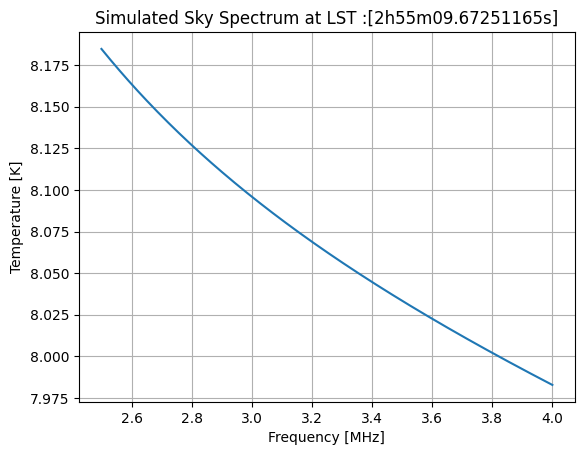

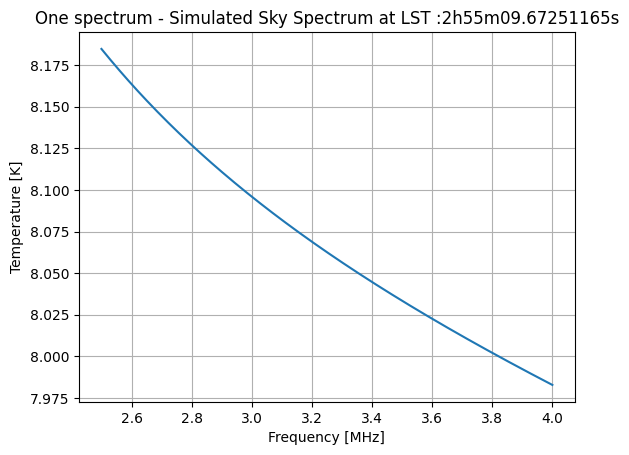

In [25]:
t = 0
while t < n_spectra:
    i = 0
    while i < 49152:  # Working on each pixel
        coords = hp.pixelfunc.pix2ang(64, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
        gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

        # Now, the coordinates in Galactic frame are changed to equatorial frame below
        equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude)

        

        # Using power law relation to fit spectra of three frequency maps
        #def func(xx, a):
            #return sky_408[i - 1] * np.power((xx / 0.408), a)

        #xx = np.array([0.408, 1.420, 23])
        #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

        #popt, pcov = curve_fit(func, xx, yy)
        #a_param = popt[0]

        j = 0
        longitudes = equi.az.value
        while j < 251:
            new_map1 = combined_array[:,j]
            if longitudes > 359.00:
                longitudes = 359.00
            cwt = beam_def(frequencies[j], new_alt, longitudes)
            if cwt > 0:  # Adding all the three intensities
                map_1 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map1[i - 1]) / (c ** 2)
                Power = (map_1 * cwt + CMB_Int[j]) * (c * c / (1e+18 * frequencies[j] ** 2))  # +Rec_int[j]
                final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                cross_real[j] = cross_real[j] + 1 * final_temp
                sumwt[j] = sumwt[j] + cwt
            j = j + 1

        if i % 10000 == 0:
            print('Number of pixels got: ', i)

        i = i + 1

    i = 0
    while i < No_of_Channels:
        if sumwt[i] > 0:
            cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
        i = i + 1

   

    sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

    # Generating an array of random integers with mean 0 and std 1.
    array = np.random.normal(0, 1, No_of_Channels)

    # Adding the gaussian error
    cross_real = cross_real + array * sigma
    cross_imag = cross_imag + array * sigma

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0] * No_of_Channels
    cross_imag = [0] * No_of_Channels
    sumwt = [0] * No_of_Channels
    sigma = [0] * No_of_Channels
    
    print("No. of spectra got = ", t + 1)

    t = t + 1

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
lst = t.sidereal_time('apparent')

i = 0
while i < n_spectra:
    plt.plot(frequencies, spectra[i])
    i = i + 1

plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s' % lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0])
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s' % lst[0])
plt.grid()
plt.show()

In [26]:
def mixing_matrix(frequencies, alt, az):
    sin_theta = (np.sin(alt*np.pi/180))**2

    matrix = np.array([[sin_theta * 0.5, 0.0],
                       [0.0, sin_theta * 0.5]], dtype=complex)

    conjugate_matrix = np.conjugate(matrix)
    
    kronecker_product = np.kron(matrix, conjugate_matrix)

    S_matrix = np.array([[0.5, 0.5, 0, 0],
                         [0, 0, 0.5, 0.5*1j],
                         [0, 0, 0.5, -0.5*1j],
                         [0.5, -0.5, 0, 0]], dtype=complex)

    result = np.dot(kronecker_product, S_matrix)

    return result



Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


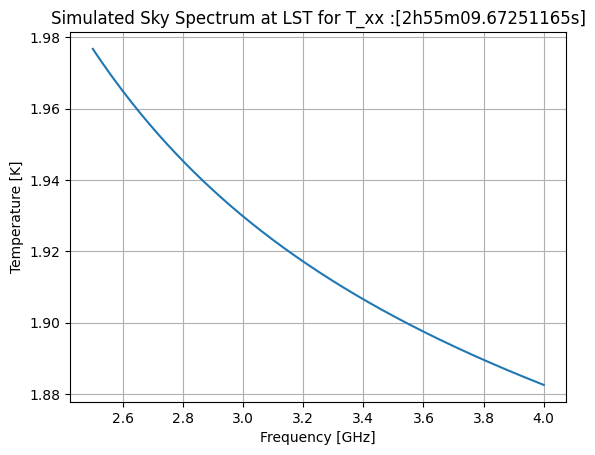

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


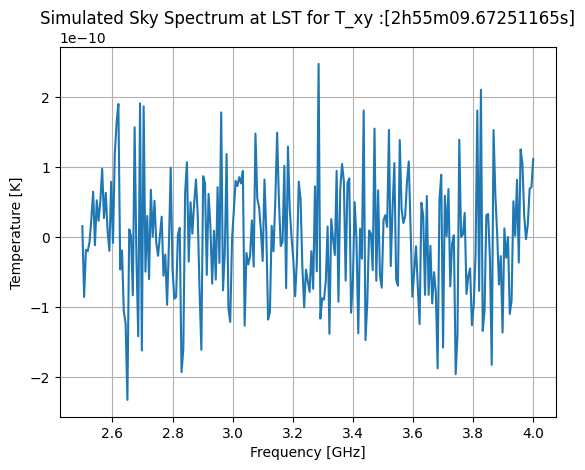

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


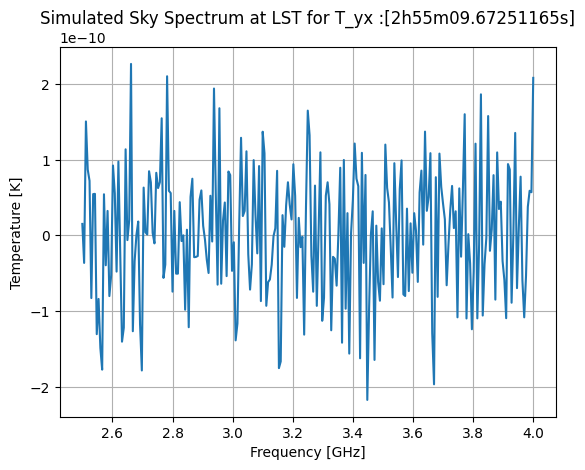

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


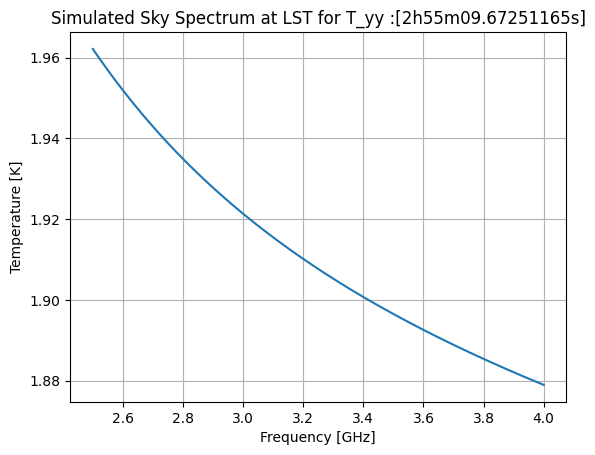

h = 3 is completed


In [27]:
output_dir = '/Users/hshishir/Desktop/polarization_maps/spec'
os.makedirs(output_dir, exist_ok=True)

titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):

    t = 0
    while t < n_spectra:
        i = 0
        while i < 49152:  # Working on each pixel
            coords = hp.pixelfunc.pix2ang(64, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
            gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

            # Now, the coordinates in Galactic frame are changed to equatorial frame below
            equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
            alt = equi.alt.value
            new_alt = refraction(alt, altitude)

        

            # Using power law relation to fit spectra of three frequency maps
            #def func(xx, a):
                #return sky_408[i - 1] * np.power((xx / 0.408), a)

            #xx = np.array([0.408, 1.420, 23])
            #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

            #popt, pcov = curve_fit(func, xx, yy)
            #a_param = popt[0]

            j = 0
            longitudes = equi.az.value
            while j < 251:
                new_map = combined_array[:,j]
                new_map1 = combined_array1[:,j]
                new_map2 = combined_array2[:,j]
                if longitudes > 359.00:
                    longitudes = 359.00
                result = mixing_matrix(frequencies[j], new_alt, None)
                cwt = np.sqrt((result[h,0]**2) + (result[h,1]**2) + (result[h,2]**2) + (result[h,3]**2))

                if cwt > 0:  # Adding all the three intensities
                    map_0 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map[i - 1]) / (c ** 2)
                    map_1 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map1[i - 1]) / (c ** 2)
                    map_2 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map2[i - 1]) / (c ** 2)
                    Power = (( ((map_0 + CMB_Int[j]) * result[h,0]) + (map_1 * result[h,1]) + (map_2 * result[h,2]) + (0 * result[h,3]) ) ) * (c * c / (1e+18 * frequencies[j] ** 2))  # +Rec_int[j]
                    final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                    cross_real[j] = cross_real[j] + 1 * final_temp
                    sumwt[j] = sumwt[j] + cwt
                j = j + 1

            if i % 10000 == 0:
                print('Number of pixels got: ', i)

            i = i + 1

        i = 0
        while i < No_of_Channels:
            if sumwt[i] > 0:
                cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
            i = i + 1

   

        sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

        # Generating an array of random integers with mean 0 and std 1.
        array = np.random.normal(0, 1, No_of_Channels)

        # Adding the gaussian error
        cross_real = cross_real + array * sigma
        cross_imag = cross_imag + array * sigma

        output_file = os.path.join(output_dir, f"spectrum_{titles[h]}_{t}.txt")
        with open(output_file, "w") as file:
            for freq, temp in zip(frequencies, cross_real):
                file.write(f"{freq}\t{temp}\n")

        spectra[t] = cross_real
        spectra_cross_imag[t] = cross_imag

        cross_real = [0] * No_of_Channels
        cross_imag = [0] * No_of_Channels
        sumwt = [0] * No_of_Channels
        sigma = [0] * No_of_Channels

        print("No. of spectra got = ", t + 1)

        t = t + 1

    Obs = ephem.Observer()
    t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
    lst = t.sidereal_time('apparent')

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra[i])
        i = i + 1

    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra[0])
    #plt.xlabel('Frequency [GHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy :%s' % lst[0])
    #plt.grid()
    #plt.show()

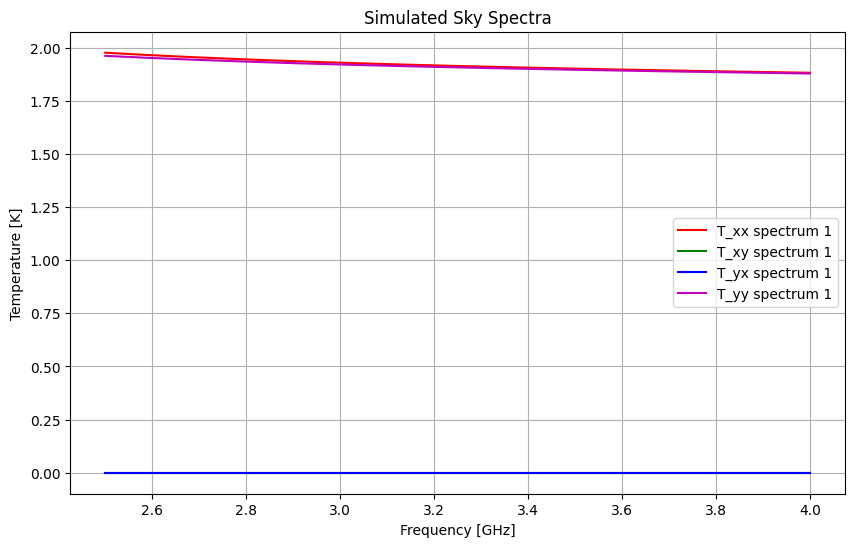

In [43]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

output_dir = '/Users/hshishir/Desktop/polarization_maps/spec'
titles = ["T_xx", "T_xy", "T_yx", "T_yy"]
colors = ['r', 'g', 'b', 'm']

x_values = np.linspace(2.5, 4, 251)
spectra_data = {}

for h in range(4):
    spectra_data[titles[h]] = []
    for t in range(n_spectra):
        file_path = os.path.join(output_dir, f"spectrum_{titles[h]}_{0}.txt")
        frequencies, temperatures = [], []
        with open(file_path, 'r') as file:
            for line in file:
                freq, temp = line.strip().split('\t')
                freq = float(freq)
                temp = complex(temp).real
                frequencies.append(freq)
                temperatures.append(temp)

        f_interp = interp1d(frequencies, temperatures, kind='linear', fill_value='extrapolate')
        y_values = f_interp(x_values)

        spectra_data[titles[h]].append((x_values, y_values))

        output_file_path = os.path.join(output_dir, f"interpolated_spectrum_{titles[h]}_{0}.txt")
        with open(output_file_path, 'w') as output_file:
            for x, y in zip(x_values, y_values):
                output_file.write(f"{x}\t{y}\n")

plt.figure(figsize=(10, 6))
for h, title in enumerate(titles):
    for t in range(n_spectra):
        x_values, y_values = spectra_data[title][t]
        plt.plot(x_values, y_values, color=colors[h], label=f'{title} spectrum {t+1}' if t == 0 else "")

plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectra')
plt.grid()
plt.legend()
plt.show()

Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


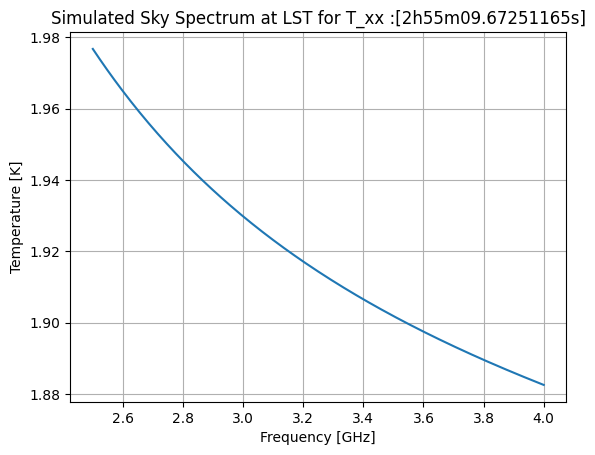

h = 0 is completed
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


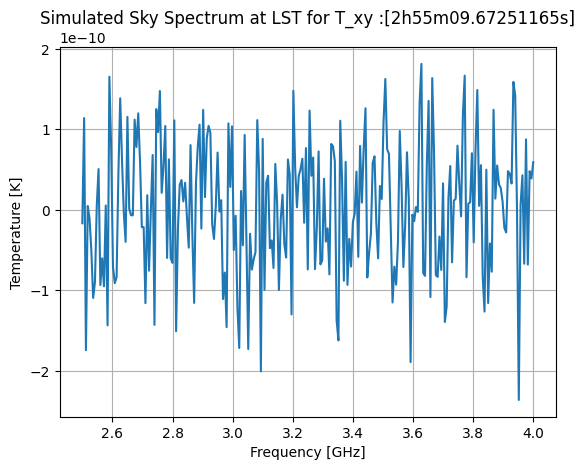

h = 1 is completed
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


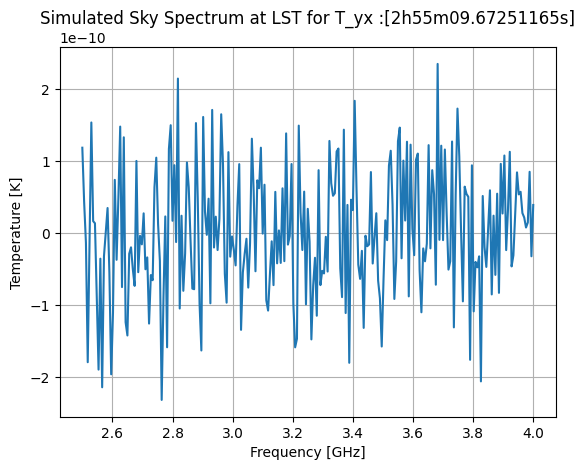

h = 2 is completed
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


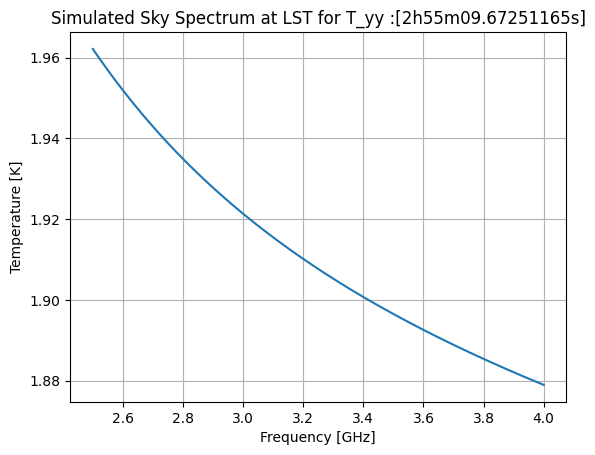

h = 3 is completed


In [44]:
output_dir = '/Users/hshishir/Desktop/polarization_maps/spec'
os.makedirs(output_dir, exist_ok=True)

titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):

    t = 0
    while t < n_spectra:
        i = 0
        while i < 49152:  # Working on each pixel
            coords = hp.pixelfunc.pix2ang(64, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
            gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

            # Now, the coordinates in Galactic frame are changed to equatorial frame below
            equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
            alt = equi.alt.value
            new_alt = refraction(alt, altitude)

        

            # Using power law relation to fit spectra of three frequency maps
            #def func(xx, a):
                #return sky_408[i - 1] * np.power((xx / 0.408), a)

            #xx = np.array([0.408, 1.420, 23])
            #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

            #popt, pcov = curve_fit(func, xx, yy)
            #a_param = popt[0]

            j = 0
            longitudes = equi.az.value
            while j < 251:
                new_map = combined_array[:,j]
                new_map1 = combined_array1[:,j]
                new_map2 = combined_array2[:,j]
                if longitudes > 359.00:
                    longitudes = 359.00
                result = mixing_matrix(frequencies[j], new_alt, None)
                cwt = np.sqrt((result[h,0]**2) + (result[h,1]**2) + (result[h,2]**2) + (result[h,3]**2))

                if cwt > 0:  # Adding all the three intensities
                    map_0 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map[i - 1]) / (c ** 2)
                    map_1 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map1[i - 1]) / (c ** 2)
                    map_2 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map2[i - 1]) / (c ** 2)
                    Power = (( ((map_0 + CMB_Int[j] + recomb_li.iloc[j,1]) * result[h,0]) + (map_1 * result[h,1]) + (map_2 * result[h,2]) + (0 * result[h,3]) ) ) * (c * c / (1e+18 * frequencies[j] ** 2))  # +Rec_int[j]
                    final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                    cross_real[j] = cross_real[j] + 1 * final_temp
                    sumwt[j] = sumwt[j] + cwt
                j = j + 1

            if i % 10000 == 0:
                print('Number of pixels got: ', i)

            i = i + 1

        i = 0
        while i < No_of_Channels:
            if sumwt[i] > 0:
                cross_real[i] = cross_real[i] / sumwt[i]  # normalization with respect to the beam pattern
            i = i + 1

   

        sigma = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation

        # Generating an array of random integers with mean 0 and std 1.
        array = np.random.normal(0, 1, No_of_Channels)

        # Adding the gaussian error
        cross_real = cross_real + array * sigma
        cross_imag = cross_imag + array * sigma

        output_file = os.path.join(output_dir, f"spectrum_CRR_{titles[h]}_{t}.txt")
        with open(output_file, "w") as file:
            for freq, temp in zip(frequencies, cross_real):
                file.write(f"{freq}\t{temp}\n")

        spectra[t] = cross_real
        spectra_cross_imag[t] = cross_imag

        cross_real = [0] * No_of_Channels
        cross_imag = [0] * No_of_Channels
        sumwt = [0] * No_of_Channels
        sigma = [0] * No_of_Channels

        print("No. of spectra got = ", t + 1)

        t = t + 1

    Obs = ephem.Observer()
    t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
    lst = t.sidereal_time('apparent')

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra[i])
        i = i + 1

    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra[0])
    #plt.xlabel('Frequency [GHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy :%s' % lst[0])
    #plt.grid()
    #plt.show()

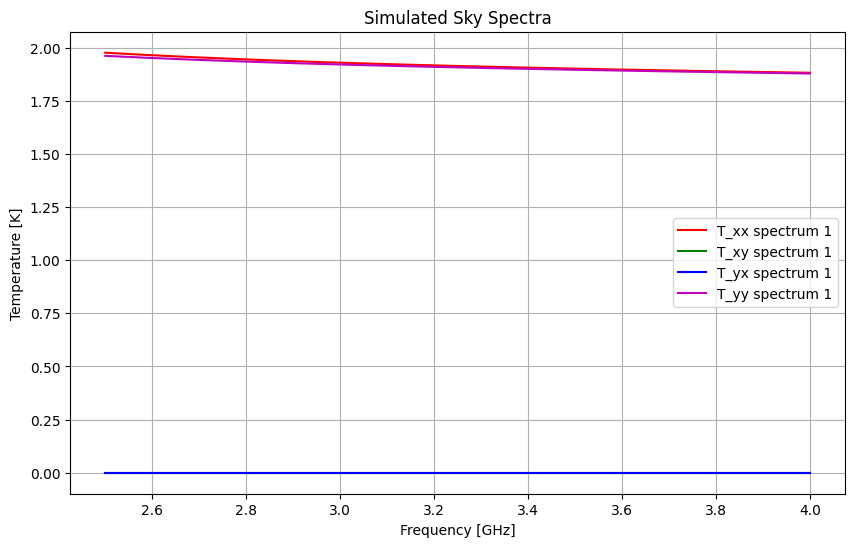

In [45]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

output_dir = '/Users/hshishir/Desktop/polarization_maps/spec'
titles = ["T_xx", "T_xy", "T_yx", "T_yy"]
colors = ['r', 'g', 'b', 'm']

x_values = np.linspace(2.5, 4, 251)
spectra_data = {}

for h in range(4):
    spectra_data[titles[h]] = []
    for t in range(n_spectra):
        file_path = os.path.join(output_dir, f"spectrum_CRR_{titles[h]}_{0}.txt")
        frequencies, temperatures = [], []
        with open(file_path, 'r') as file:
            for line in file:
                freq, temp = line.strip().split('\t')
                freq = float(freq)
                temp = complex(temp).real
                frequencies.append(freq)
                temperatures.append(temp)

        f_interp = interp1d(frequencies, temperatures, kind='linear', fill_value='extrapolate')
        y_values = f_interp(x_values)

        spectra_data[titles[h]].append((x_values, y_values))

        output_file_path = os.path.join(output_dir, f"interpolated_spectrum_CRR_{titles[h]}_{0}.txt")
        with open(output_file_path, 'w') as output_file:
            for x, y in zip(x_values, y_values):
                output_file.write(f"{x}\t{y}\n")

plt.figure(figsize=(10, 6))
for h, title in enumerate(titles):
    for t in range(n_spectra):
        x_values, y_values = spectra_data[title][t]
        plt.plot(x_values, y_values, color=colors[h], label=f'{title} spectrum {t+1}' if t == 0 else "")

plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectra')
plt.grid()
plt.legend()
plt.show()

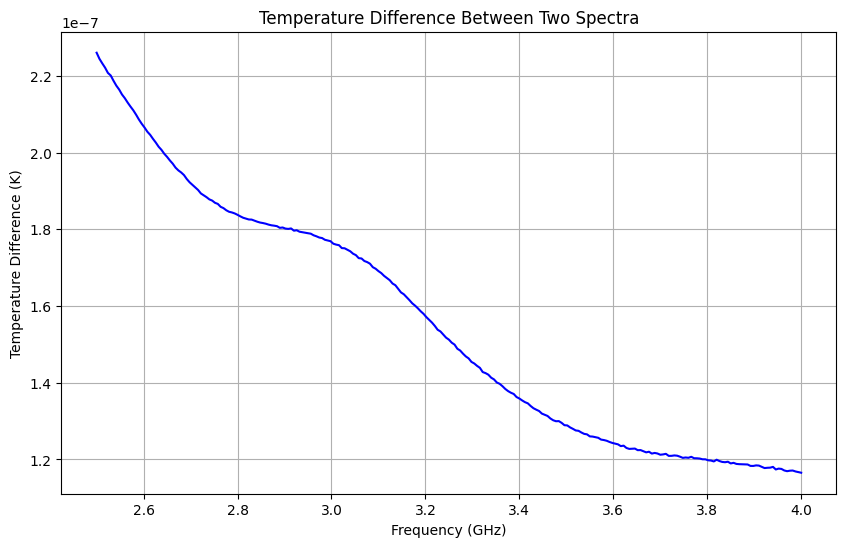

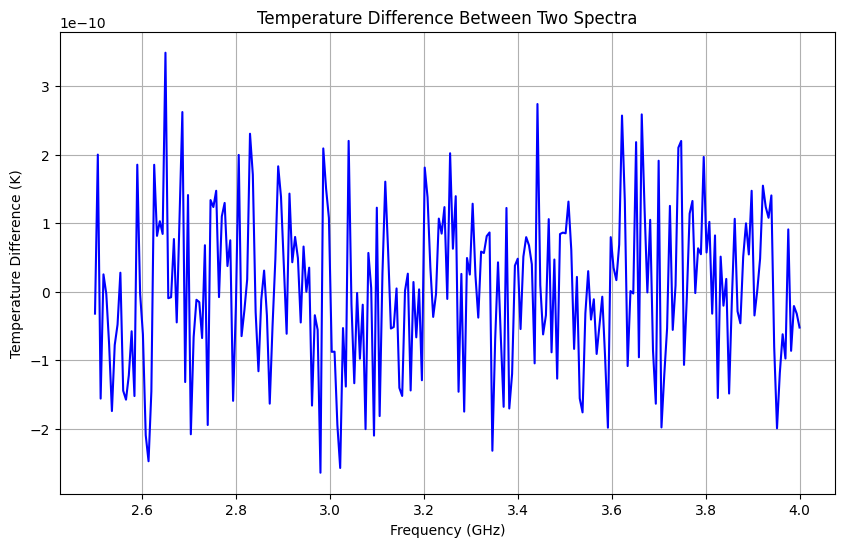

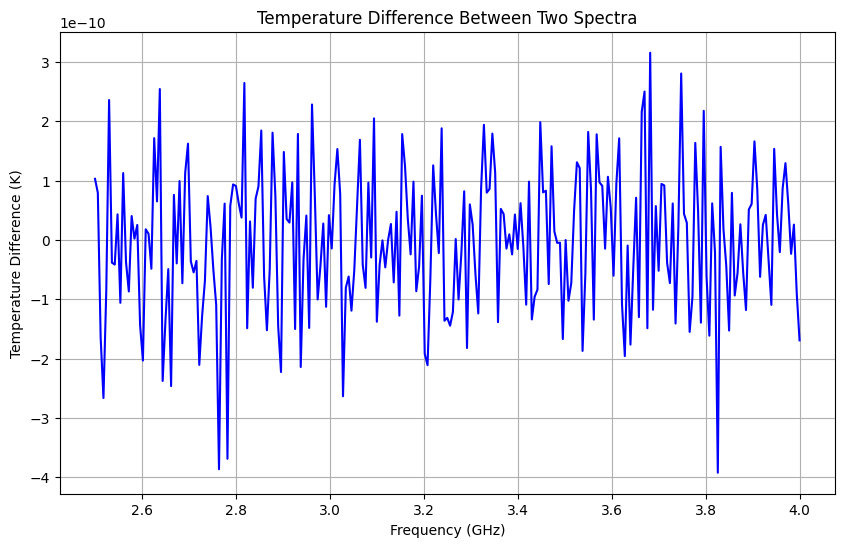

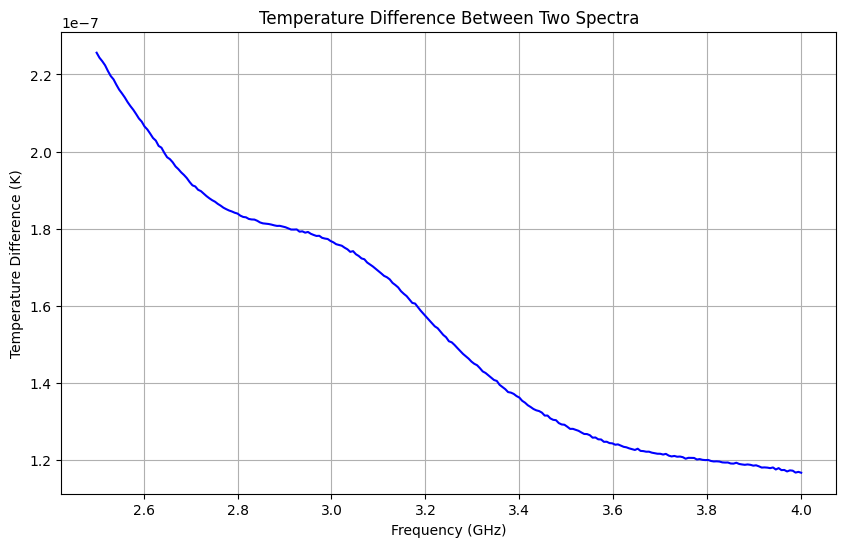

In [46]:
titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):
    output_dir1 = f'/Users/hshishir/Desktop/polarization_maps/spec/interpolated_spectrum_{titles[h]}_0.txt'
    output_dir2 = f'/Users/hshishir/Desktop/polarization_maps/spec/interpolated_spectrum_CRR_{titles[h]}_0.txt'

    data1 = pd.read_csv(output_dir1, delimiter='\t', header=None)
    data2 = pd.read_csv(output_dir2, delimiter='\t', header=None)

    temperatures1 = data1[1]
    temperatures2 = data2[1]

    # if len(temperatures1) != len(temperatures2):
    #     raise ValueError("The files do not have the same number of rows")

    temperature_diff = temperatures2 - temperatures1

    frequencies = data1[0]

    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, temperature_diff, linestyle='-', color='b')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Temperature Difference (K)')
    plt.title('Temperature Difference Between Two Spectra')
    plt.grid(True)
    plt.show()


In [47]:
def mixing_matrix1(frequencies, alt, az):
    sin_theta = (np.sin(alt*np.pi/180))**2

    matrix = np.array([[sin_theta * 0.5, 0],
                       [0, sin_theta * 0.5]], dtype=complex)
    
    quarter_wave_plate = np.array([[1, 0],
                                [0, 1j]], dtype=complex)
    
    matrix1 = np.dot(quarter_wave_plate, matrix)

    conjugate_matrix = np.conjugate(matrix1)
    
    kronecker_product = np.kron(matrix1, conjugate_matrix)

    S_matrix = np.array([[0.5, 0.5, 0, 0],
                         [0, 0, 0.5, 0.5*1j],
                         [0, 0, 0.5, -0.5*1j],
                         [0.5, -0.5, 0, 0]], dtype=complex)

    result = np.dot(kronecker_product, S_matrix)

    return result

Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


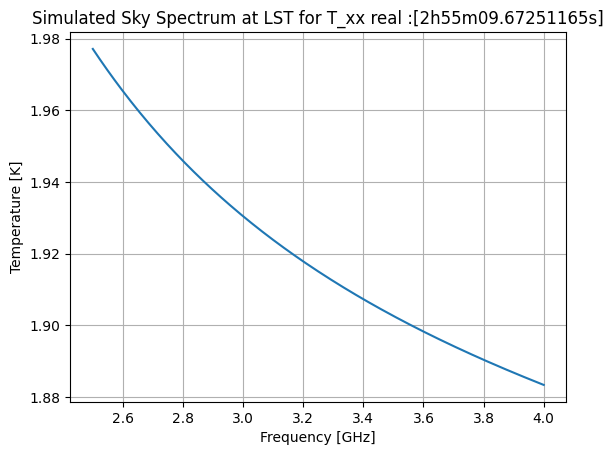

h = 0 is completed


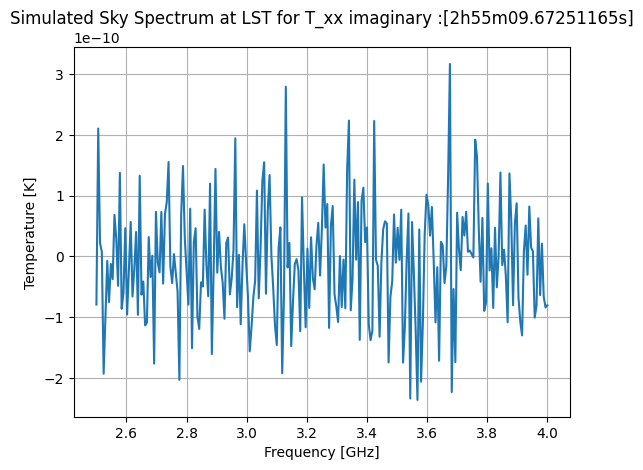

h = 0 is completed
Sigma array for each channel and each timestamp:
[[0.13079522617765596 0.13079197108495344 0.13078874298302254 ...
  0.13039196939606187 0.13039110518499672 0.13039024359977058]
 [0.                  0.                  0.                  ...
  0.                  0.                  0.                 ]
 [0.                  0.                  0.                  ...
  0.                  0.                  0.                 ]
 [0.                  0.                  0.                  ...
  0.                  0.                  0.                 ]]
1004
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


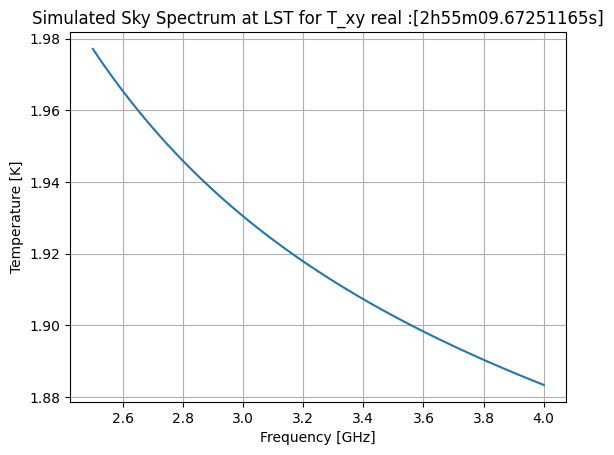

h = 1 is completed


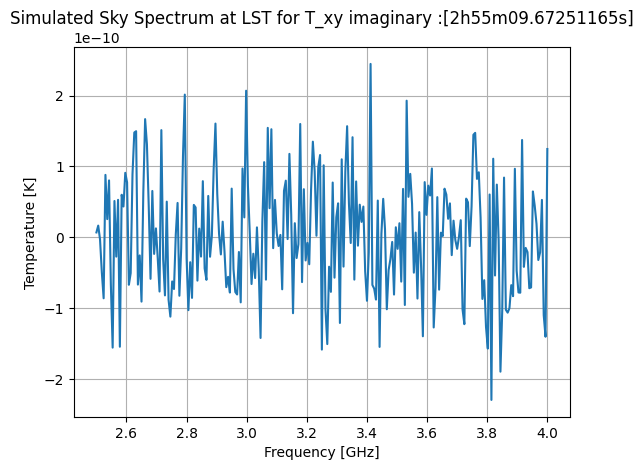

h = 1 is completed
Sigma array for each channel and each timestamp:
[[1.3079522617765597e+08 1.3079197108495344e+08 1.3078874298302254e+08
  ... 1.3039196939606187e+08 1.3039110518499672e+08
  1.3039024359977059e+08]
 [1.3079522617765596e-01 1.3079197108495344e-01 1.3078874298302254e-01
  ... 1.3039196939606187e-01 1.3039110518499672e-01
  1.3039024359977058e-01]
 [0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00
  ... 0.0000000000000000e+00 0.0000000000000000e+00
  0.0000000000000000e+00]
 [0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00
  ... 0.0000000000000000e+00 0.0000000000000000e+00
  0.0000000000000000e+00]]
1004
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


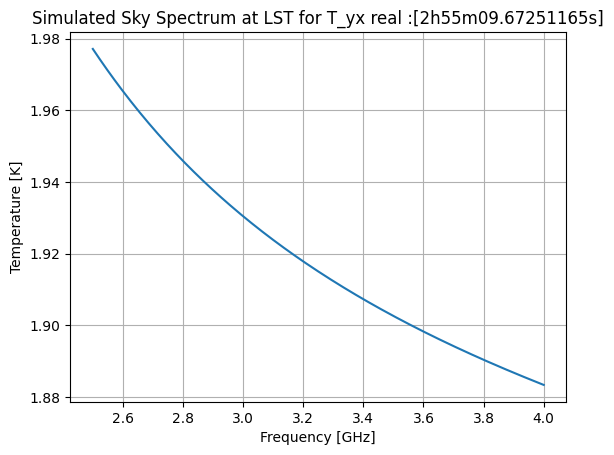

h = 2 is completed


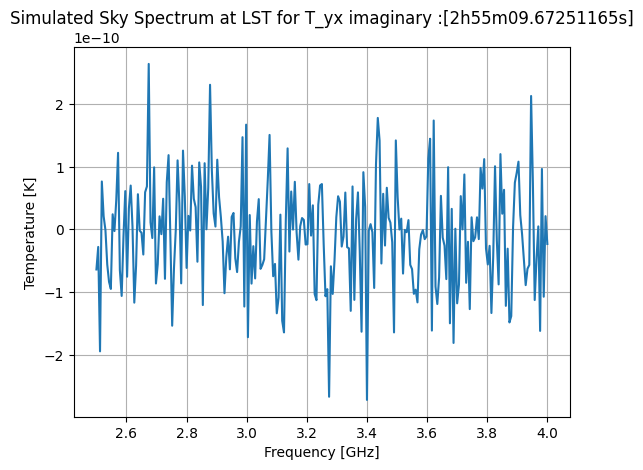

h = 2 is completed
Sigma array for each channel and each timestamp:
[[1.3079522617765597e+17 1.3079197108495344e+17 1.3078874298302254e+17
  ... 1.3039196939606187e+17 1.3039110518499672e+17
  1.3039024359977059e+17]
 [1.3079522617765597e+08 1.3079197108495344e+08 1.3078874298302254e+08
  ... 1.3039196939606187e+08 1.3039110518499672e+08
  1.3039024359977059e+08]
 [1.3079522617765596e-01 1.3079197108495344e-01 1.3078874298302254e-01
  ... 1.3039196939606187e-01 1.3039110518499672e-01
  1.3039024359977058e-01]
 [0.0000000000000000e+00 0.0000000000000000e+00 0.0000000000000000e+00
  ... 0.0000000000000000e+00 0.0000000000000000e+00
  0.0000000000000000e+00]]
1004
Number of pixels got:  0
Number of pixels got:  10000
Number of pixels got:  20000
Number of pixels got:  30000
Number of pixels got:  40000
No. of spectra got =  1


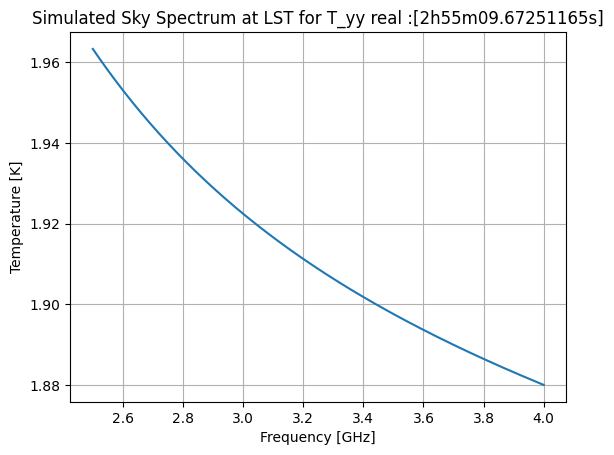

h = 3 is completed


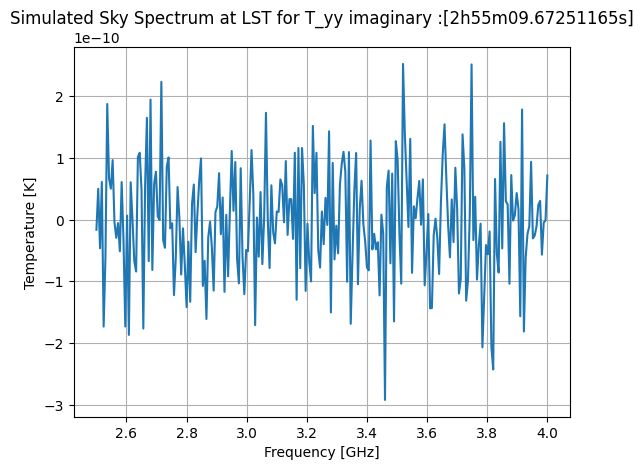

h = 3 is completed
Sigma array for each channel and each timestamp:
[[1.3079522617765596e+26 1.3079197108495345e+26 1.3078874298302254e+26
  ... 1.3039196939606187e+26 1.3039110518499672e+26
  1.3039024359977058e+26]
 [1.3079522617765597e+17 1.3079197108495344e+17 1.3078874298302254e+17
  ... 1.3039196939606187e+17 1.3039110518499672e+17
  1.3039024359977059e+17]
 [1.3079522617765597e+08 1.3079197108495344e+08 1.3078874298302254e+08
  ... 1.3039196939606187e+08 1.3039110518499672e+08
  1.3039024359977059e+08]
 [1.3073549223976436e-01 1.3073266639503364e-01 1.3072986343648929e-01
  ... 1.3037731289354168e-01 1.3037651490059624e-01
  1.3037571913664703e-01]]
1004


In [77]:
sigma_array = np.zeros((4, No_of_Channels))

output_dir = '/Users/hshishir/Desktop/polarization_maps/halfwave'
os.makedirs(output_dir, exist_ok=True)

titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):

    t = 0
    while t < n_spectra:
        i = 0
        while i < 49152:  # Working on each pixel
            coords = hp.pixelfunc.pix2ang(64, i, nest = True, lonlat=True)  # Gives l and b coordinates for each pixel
            gc = SkyCoord(l=coords[0] * u.degree, b=coords[1] * u.degree, frame='galactic')

            # Now, the coordinates in Galactic frame are changed to equatorial frame below
            equi = gc.transform_to(AltAz(obstime=Time_in_UTC[t], location=EarthLocation(lat=latitude * u.deg, lon=longitude * u.deg, height=altitude * u.m)))
            alt = equi.alt.value
            new_alt = refraction(alt, altitude)

        

            # Using power law relation to fit spectra of three frequency maps
            #def func(xx, a):
                #return sky_408[i - 1] * np.power((xx / 0.408), a)

            #xx = np.array([0.408, 1.420, 23])
            #yy = np.array([sky_408[i - 1], sky_1420[i - 1], sky_23000[i - 1]])

            #popt, pcov = curve_fit(func, xx, yy)
            #a_param = popt[0]

            j = 0
            longitudes = equi.az.value
            while j < 251:
                new_map = combined_array[:,j]
                new_map1 = combined_array1[:,j]
                new_map2 = combined_array2[:,j]
                if longitudes > 359.00:
                    longitudes = 359.00
                result = mixing_matrix1(frequencies[j], new_alt, None)
                cwt = np.sqrt((result[h,0]**2) + (result[h,1]**2) + (result[h,2]**2) + (result[h,3]**2))

                if cwt > 0:  # Adding all the three intensities
                    map_0 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map[i - 1]) / (c ** 2)
                    map_1 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map1[i - 1]) / (c ** 2)
                    map_2 = (2 * k * 1e+18 * (frequencies[j] ** 2) * 1e-6 *new_map2[i - 1]) / (c ** 2)
                    Power = (( ((map_0 + CMB_Int[j] + recomb_li.iloc[j,1]) * result[h,0]) + (map_1 * result[h,1]) + (map_2 * result[h,2]) + (0 * result[h,3]) ) ) * (c * c / (1e+18 * frequencies[j] ** 2))  # +Rec_int[j]
                    final_temp = (Power / P_dif[j]) * (T_hot - T_cold)
                    cross_mix[j] = cross_mix[j] + 1 * final_temp
                    sumwt[j] = sumwt[j] + cwt
                j = j + 1

            if i % 10000 == 0:
                print('Number of pixels got: ', i)

            i = i + 1

        i = 0
        while i < No_of_Channels:
            if sumwt[i] > 0:
                cross_mix[i] = cross_mix[i] / sumwt[i]  # normalization with respect to the beam pattern
            i = i + 1

        cross_mix = np.array(cross_mix)
        cross_real = cross_mix.real
        cross_imag = cross_mix.imag
        
        sigma_real = (np.array(cross_real) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)  # radiometric equation
        sigma_imag = (np.array(cross_imag) + Trx + T_atm) / np.sqrt(Channel_width * 1e+9 * Noise_int_time)

        sigma_array[h] = np.sqrt(sigma_real**2 + sigma_imag**2)

        np.savetxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array_3/sigma_array_spectra{h}.txt', sigma_array[h] * 1e+9)
        
        # Generating an array of random integers with mean 0 and std 1.
        array = np.random.normal(0, 1, No_of_Channels)

        # Adding the gaussian error
        cross_real = cross_real + array * sigma_real
        cross_imag = cross_imag + array * sigma_imag

        output_file_real = os.path.join(output_dir, f"spectrum_CRR_real{titles[h]}_{t}.txt")
        with open(output_file_real, "w") as file:
            for freq, temp in zip(frequencies, cross_real):
                file.write(f"{freq}\t{temp}\n")

        output_file_imag = os.path.join(output_dir, f"spectrum_CRR_imag{titles[h]}_{t}.txt")
        with open(output_file_imag, "w") as file:
            for freq, temp in zip(frequencies, cross_imag):
                file.write(f"{freq}\t{temp}\n")


        spectra_real[t] = cross_real
        spectra_imag[t] = cross_imag

        cross_real = [0] * No_of_Channels
        cross_imag = [0] * No_of_Channels
        sumwt = [0] * No_of_Channels
        sigma = [0] * No_of_Channels
    
        print("No. of spectra got = ", t + 1)

        t = t + 1

    Obs = ephem.Observer()
    t = Time(Time_in_UTC, scale='utc', location=(longitude, latitude))
    lst = t.sidereal_time('apparent')

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra_real[i])
        i = i + 1

    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} real :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra_real[0])
    #plt.xlabel('Frequency [GHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy real :%s' % lst[0])
    #plt.grid()
    #plt.show()

    i = 0
    while i < n_spectra:
        plt.plot(frequencies, spectra_imag[i])
        i = i + 1

    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Temperature [K]')
    plt.title(f"Simulated Sky Spectrum at LST for {titles[h]} imaginary :%s" % lst)
    plt.grid()
    plt.show()

    print(f"h = {h} is completed")

    #plt.plot(frequencies, spectra_imag[0])
    #plt.xlabel('Frequency [GHz]')
    #plt.ylabel('Temperature [K]')
    #plt.title('One spectrum - Simulated Sky Spectrum at LST for T_yy imaginary :%s' % lst[0])
    #plt.grid()
    #plt.show()

    sigma_array = np.array(sigma_array * 1e+9)
    print("Sigma array for each channel and each timestamp:")
    print(sigma_array)
    print(sigma_array.size)
    #np.savetxt('/Users/hshishir/Desktop/mcmc_fit/sigma_array_no_noise.txt', sigma_array)

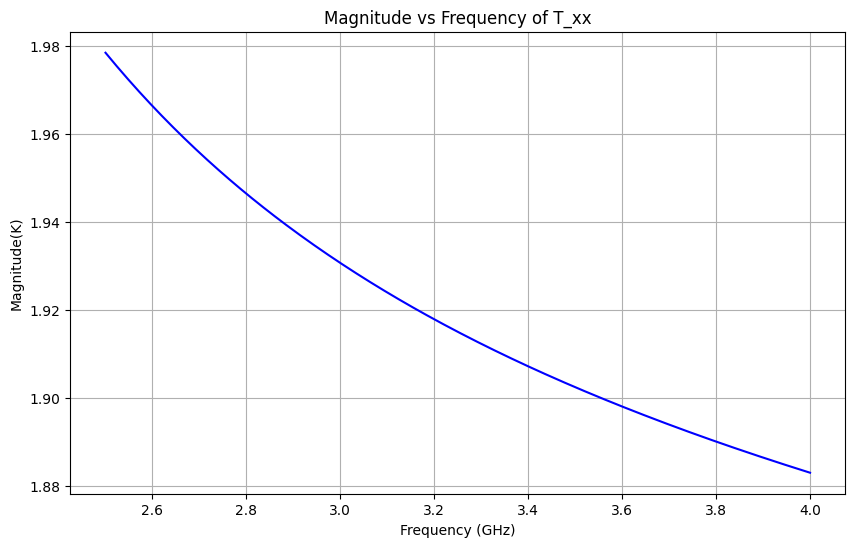

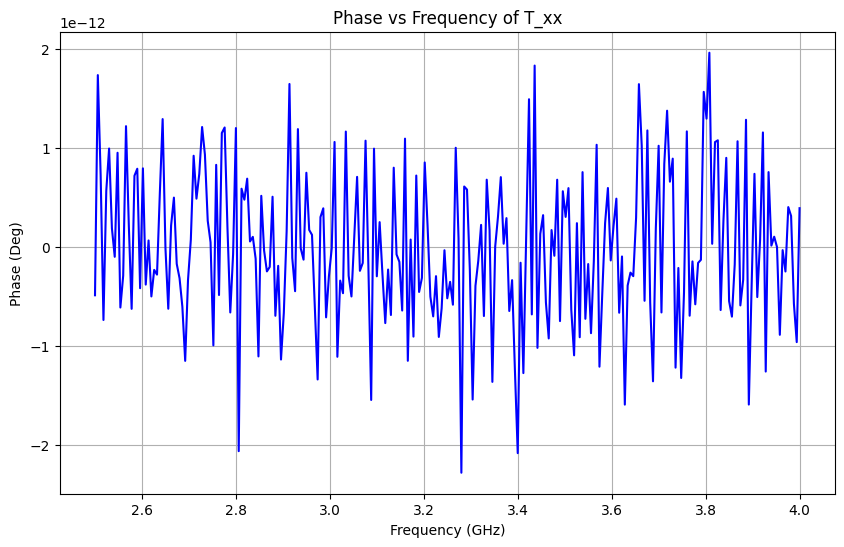

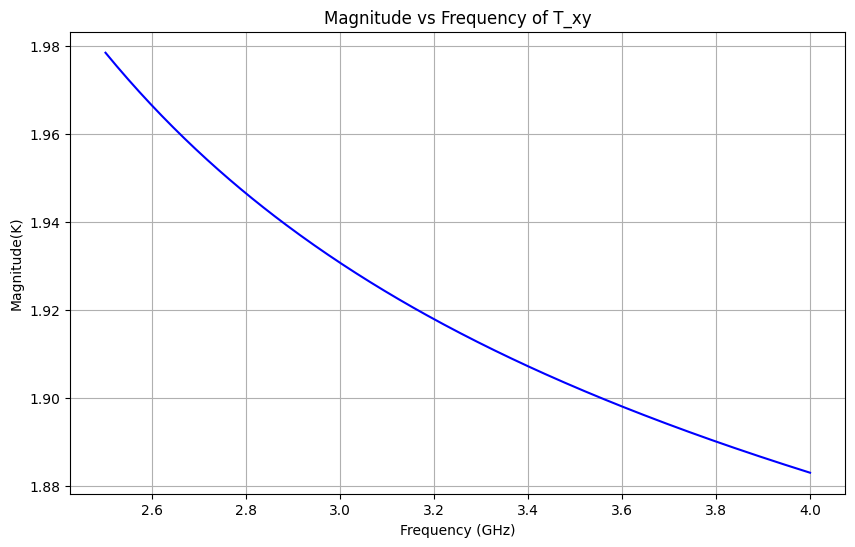

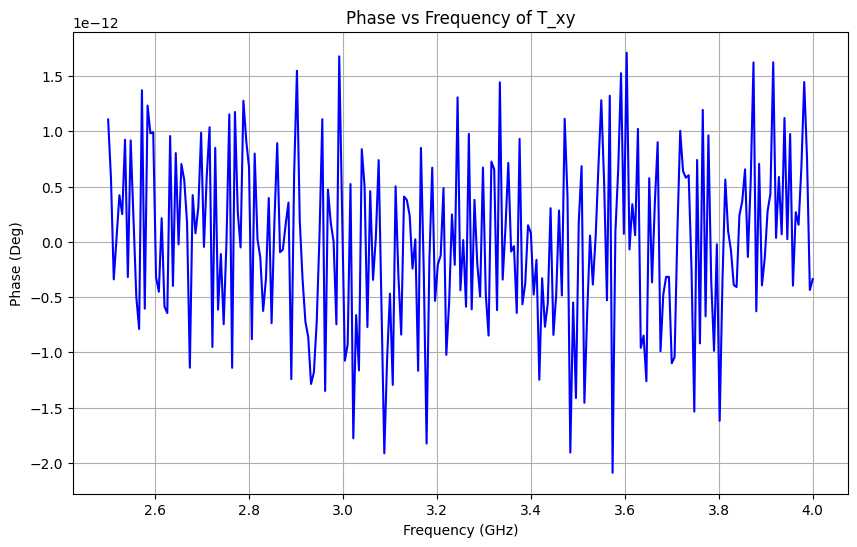

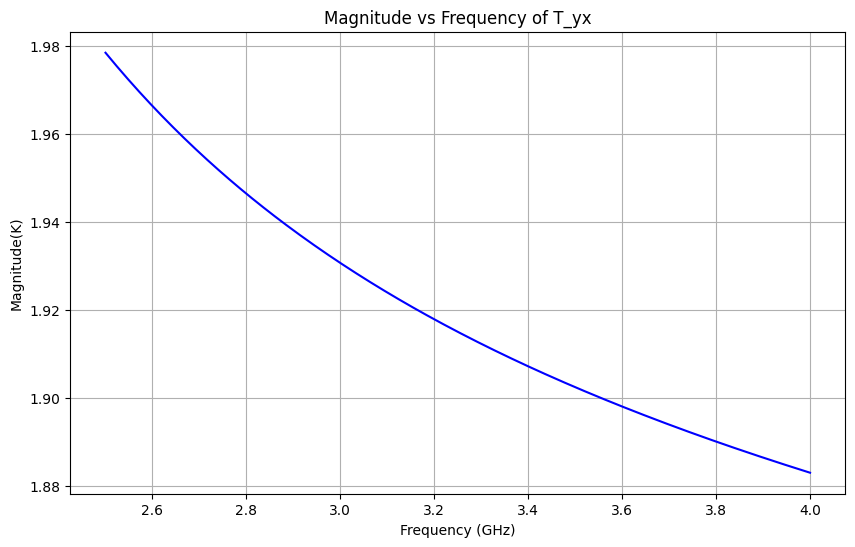

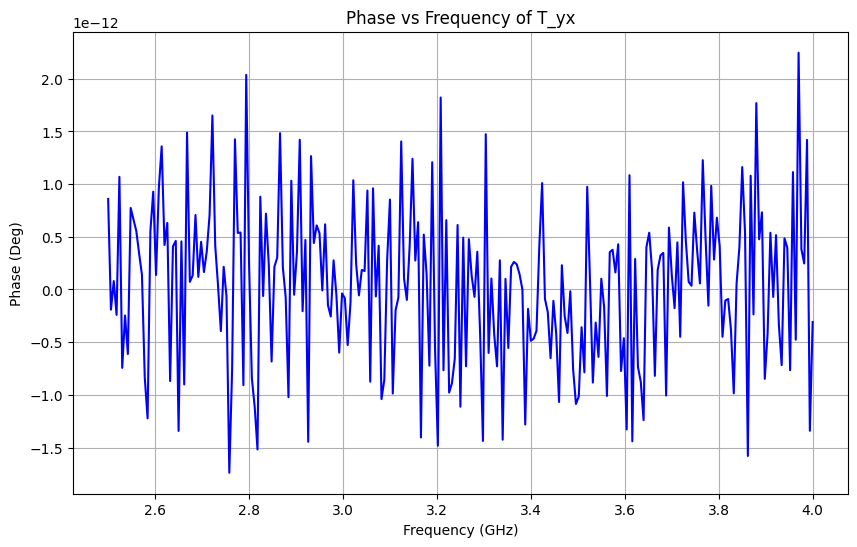

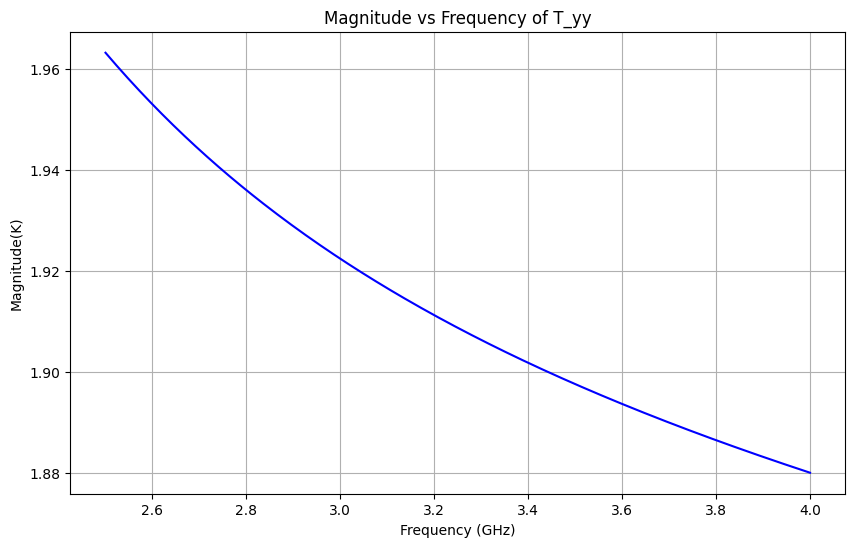

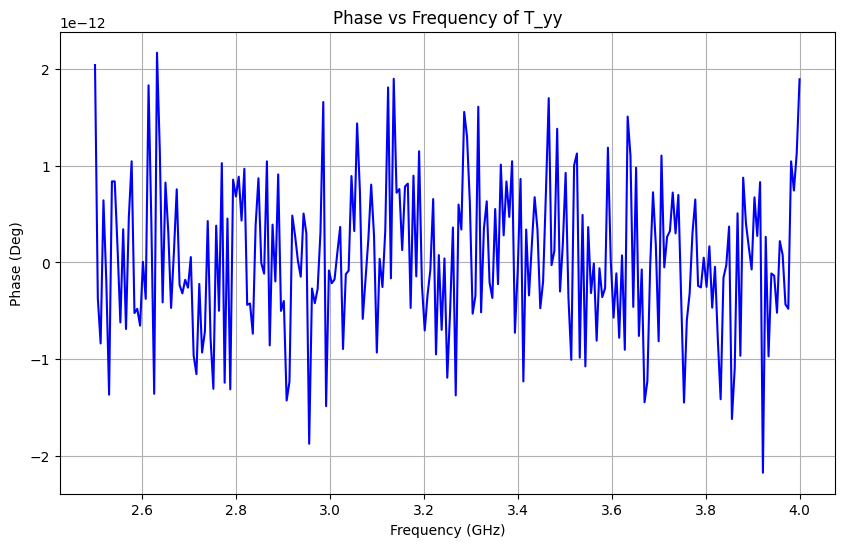

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titles = ["T_xx", "T_xy", "T_yx", "T_yy"]

for h in range(4):
    output_dir1 = f'/Users/hshishir/Desktop/polarization_maps/halfwave/spectrum_CRR_real{titles[h]}_0.txt'
    output_dir2 = f'/Users/hshishir/Desktop/polarization_maps/halfwave/spectrum_CRR_imag{titles[h]}_0.txt'

    data1 = pd.read_csv(output_dir1, delimiter='\t', header=None)
    data2 = pd.read_csv(output_dir2, delimiter='\t', header=None)

    temperatures1 = data1[1]
    temperatures2 = data2[1]

    if len(temperatures1) != len(temperatures2):
        raise ValueError("The files do not have the same number of rows")

    temperature_mag = np.sqrt((temperatures1)**2 + (temperatures2)**2)
    temperature_phase = np.arctan(temperatures2 / temperatures1 * (np.pi / 180))

    frequencies = data1[0]

    # Save temperature magnitude to a .txt file
    save_path = f'/Users/hshishir/Desktop/polarization_maps/halfwave/temperature_mag11_{titles[h]}.txt'
    np.savetxt(save_path, np.column_stack((frequencies, temperature_mag)), header='Frequency(GHz)\tMagnitude(K)', delimiter='\t', fmt='%.6e', comments='')

    # Plot Magnitude vs Frequency
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, temperature_mag, linestyle='-', color='b')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Magnitude(K)')
    plt.title(f'Magnitude vs Frequency of {titles[h]}')
    plt.grid(True)
    plt.show()

    # Plot Phase vs Frequency
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, temperature_phase, linestyle='-', color='b')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Phase (Deg)')
    plt.title(f'Phase vs Frequency of {titles[h]}')
    plt.grid(True)
    plt.show()


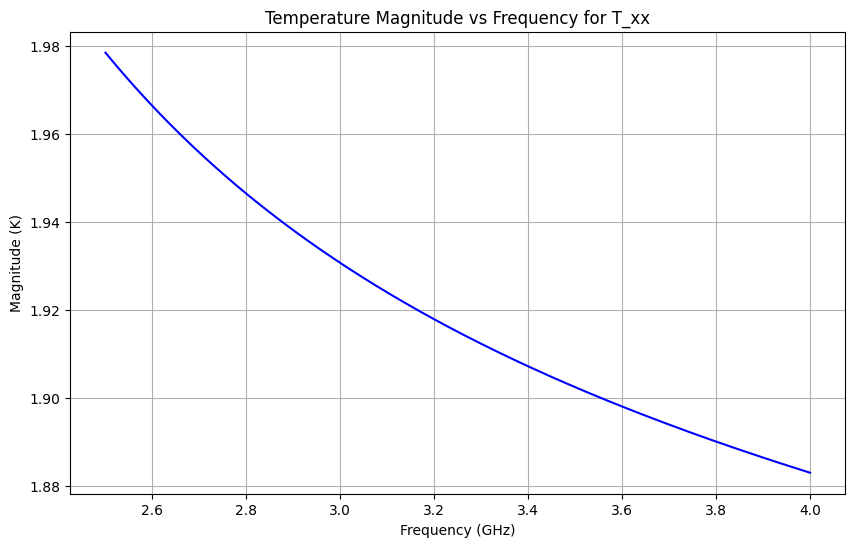

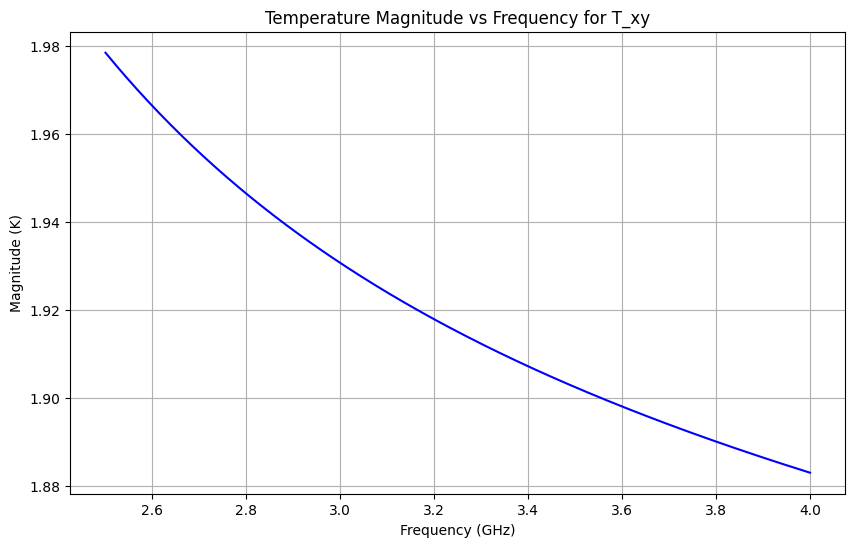

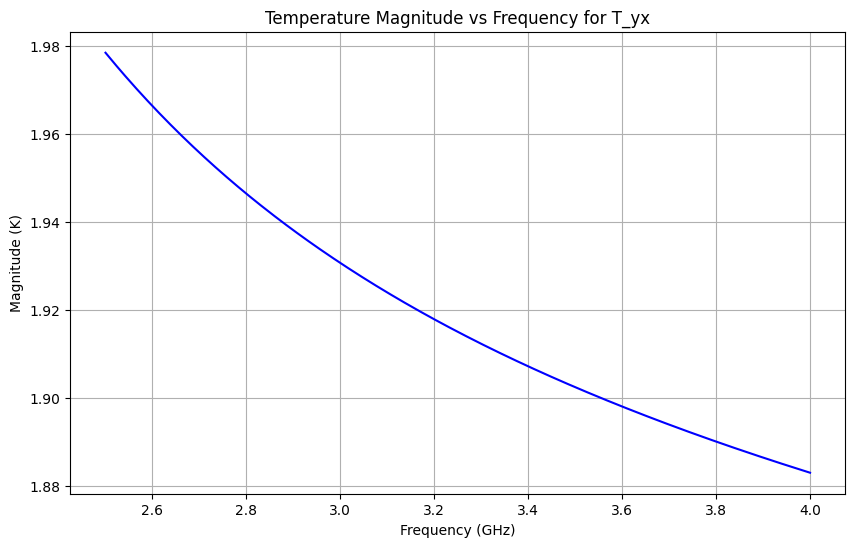

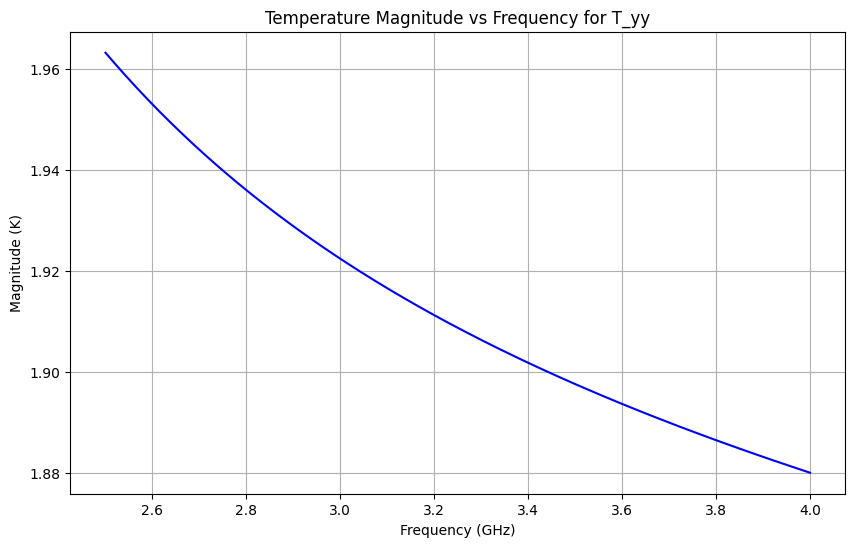

In [50]:
import matplotlib.pyplot as plt

spectrum_11 = []  # Initialize a list to store temperature magnitude arrays

for h in range(4):
    # File path for the saved temperature magnitude
    file_path = f'/Users/hshishir/Desktop/polarization_maps/halfwave/temperature_mag11_{titles[h]}.txt'
    
    # Read the file
    data = np.loadtxt(file_path, delimiter='\t', skiprows=1)  # Skip the header row
    
    # Extract frequency (first column) and temperature magnitude (second column)
    frequencies = data[:, 0]
    temperature_mag = data[:, 1]
    
    # Append to spectrum_11
    spectrum_11.append(temperature_mag)
    
    # Plot the temperature magnitude
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, temperature_mag, linestyle='-', color='b')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Magnitude (K)')
    plt.title(f'Temperature Magnitude vs Frequency for {titles[h]}')
    plt.grid(True)
    plt.show()

# Example access to arrays:
# spectrum_11[0] gives the temperature magnitude for T_xx


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import random as rndm
from math import exp, expm1, sqrt
from math import factorial as mf
from scipy.optimize import fmin
from scipy import interpolate
from matplotlib.backends.backend_pdf import PdfPages

PI=scipy.constants.pi
HH=scipy.constants.h
KK=scipy.constants.k
HbK=HH/KK
HbK9=HbK*1.0e9

## Please check the range of frequencies you are working with. Change the x1 and x2 accordingly

X1 = 2.5
X2 = 4
print (' ')
print ('CAUTION: this version is hard-coded for freq range: ',X1,' to ',X2,' GHz')

X1LOG = np.log10(X1)
X2LOG = np.log10(X2)
XDIF = X1LOG-X2LOG

np.set_printoptions(precision=20)

 
CAUTION: this version is hard-coded for freq range:  2.5  to  4  GHz


In [63]:
func1 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 \
						  )

func2 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2  \
						  )

func3 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3  \
						  )

func4 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4  \
						  )

func5 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5  \
						  )

func6 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6  \
						  )

func7 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7  \
						  )
func8 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8)

func9 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9)

func10 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10)	

func11 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10+ \
					(p[12])*(np.log10(x)-X1LOG)**11)

func12 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10+ \
					(p[12])*(np.log10(x)-X1LOG)**11+ \
					(p[13])*(np.log10(x)-X1LOG)**12)	

# define the function to be minimized by scipy.optimize.fmin
chisq1 = lambda p, x, y: sqrt(((func1(p,x)-y)**2).sum()/float(len(x)))

chisq2 = lambda p, x, y: sqrt(((func2(p,x)-y)**2).sum()/float(len(x)))

def chisq3 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func3(p,x)-y)**2).sum()/float(len(x)))

def chisq4 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func4(p,x)-y)**2).sum()/float(len(x)))
	
def chisq5 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func5(p,x)-y)**2).sum()/float(len(x)))
	
def chisq6 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func6(p,x)-y)**2).sum()/float(len(x)))

def chisq7 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func7(p,x)-y)**2).sum()/float(len(x)))

def chisq8 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) +  (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func8(p,x)-y)**2).sum()/float(len(x)))

def chisq9 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6 + (mf(9)/mf(7))*p[10]*(np.log10(x)-X1LOG)**7
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5 + \
		(mf(9)/mf(6))*p[10]*(np.log10(x)-X1LOG)**6
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4 + (mf(9)/mf(5))*p[10]*(np.log10(x)-X1LOG)**5
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3 + \
		(mf(9)/mf(4))*p[10]*(np.log10(x)-X1LOG)**4
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) + (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2 + \
	       (mf(9)/mf(3))*p[10]*(np.log10(x)-X1LOG)**3
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG) + (mf(9)/mf(2))*p[10]*(np.log10(x)-X1LOG)**2
	k8 = (mf(8)/mf(0))*p[9] + (mf(9)/mf(1))*p[10]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0 \
			or k8[i+1]*k8[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func9(p,x)-y)**2).sum()/float(len(x)))

def chisq10 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6 + (mf(9)/mf(7))*p[10]*(np.log10(x)-X1LOG)**7 + \
		(mf(10)/mf(8))*p[11]*(np.log10(x)-X1LOG)**8
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5 + \
		(mf(9)/mf(6))*p[10]*(np.log10(x)-X1LOG)**6 + (mf(10)/mf(7))*p[11]*(np.log10(x)-X1LOG)**7
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4 + (mf(9)/mf(5))*p[10]*(np.log10(x)-X1LOG)**5 + \
		(mf(10)/mf(6))*p[11]*(np.log10(x)-X1LOG)**6
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3 + \
		(mf(9)/mf(4))*p[10]*(np.log10(x)-X1LOG)**4 + (mf(10)/mf(5))*p[11]*(np.log10(x)-X1LOG)**5
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) + (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2 + \
	       (mf(9)/mf(3))*p[10]*(np.log10(x)-X1LOG)**3 + (mf(10)/mf(4))*p[11]*(np.log10(x)-X1LOG)**4
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG) + (mf(9)/mf(2))*p[10]*(np.log10(x)-X1LOG)**2 + \
	    (mf(10)/mf(3))*p[11]*(np.log10(x)-X1LOG)**3
	k8 = (mf(8)/mf(0))*p[9] + (mf(9)/mf(1))*p[10]*(np.log10(x)-X1LOG) + (mf(10)/mf(2))*p[11]*(np.log10(x)-X1LOG)**2
	k9 = (mf(9)/mf(0))*p[10] + (mf(10)/mf(1))*p[11]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0 \
			or k8[i+1]*k8[i]< 0.0 or k9[i+1]*k9[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func10(p,x)-y)**2).sum()/float(len(x)))

In [64]:
residuals = []
x0 = frequencies
x0 = np.asfarray(x0)
x0log = np.log10(x0)


low=0.05
high=10


i_low=0
i_high=len(x0)
for i in range(0, len(x0)):
	if x0[i]<=low:
		i_low=i
	if x0[i]<=high:
		i_high=i
print("Limits in index: ",i_low,i_high)
x1=x0[i_low:i_high]
x1log = np.log10(x1)
X1=(x1log[0])
print(x1log.size)

Limits in index:  0 250
250


251
251
()


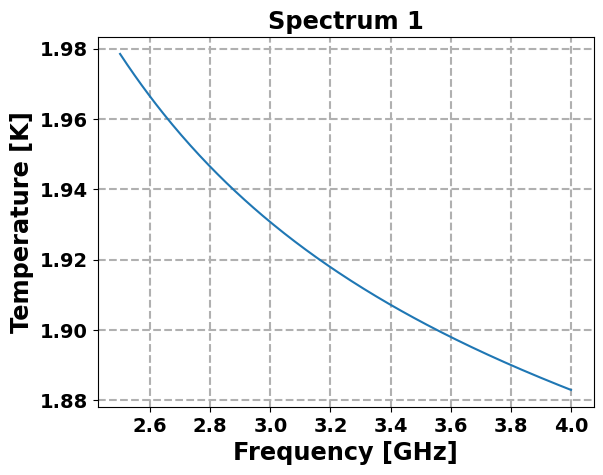

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  0.00011906262000832816
1.9643243138502566 -1.1316197476626009 -3.730833554976133
 
 
chisq2 =  2.2967183230651936e-05
1.9687795172451796 -1.160962394531822 -3.8024203403022083 -3.112665059698054
 
Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 515
         Function evaluations: 962
 
chisq3 =  3.1298040226241376e-06
1.9709170431884009 -1.1741142548170593 -3.9846277683917926 -2.33999149209518 -12.074550419491231
 
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 733
         Function evaluations: 1325
 
chisq4 =  7.804213338275817e-07
1.9716406607375583 -1.178902818187102 -4.015175046285197 -3.0508572850305766 -6.912889392299833 -31.07607757485458
 
 
chisq5 =  3.477379929610848e-07
1.972057009037641 -1.1816267108686396 -4.044126202872441 -2.9933284973145433 -11.430143543131985 -1.5600567708293185e

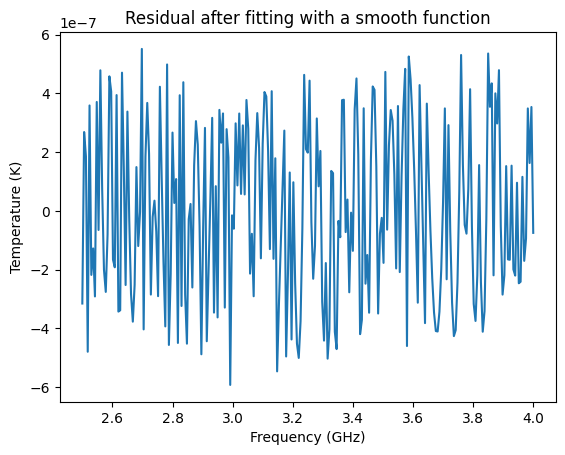

251
251
()


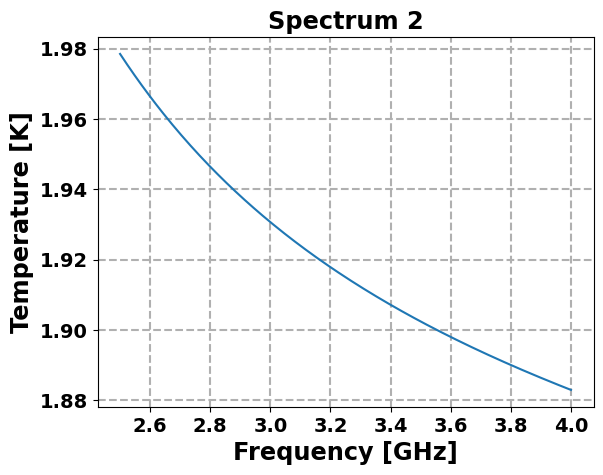

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  0.00011906262000832816
1.9643243138502566 -1.1316197476626009 -3.730833554976133
 
 
chisq2 =  2.2967183230651936e-05
1.9687795172451796 -1.160962394531822 -3.8024203403022083 -3.112665059698054
 
Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 515
         Function evaluations: 962
 
chisq3 =  3.1298040226241376e-06
1.9709170431884009 -1.1741142548170593 -3.9846277683917926 -2.33999149209518 -12.074550419491231
 
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 733
         Function evaluations: 1325
 
chisq4 =  7.804213338275817e-07
1.9716406607375583 -1.178902818187102 -4.015175046285197 -3.0508572850305766 -6.912889392299833 -31.07607757485458
 
 
chisq5 =  3.477379929610848e-07
1.972057009037641 -1.1816267108686396 -4.044126202872441 -2.9933284973145433 -11.430143543131985 -1.5600567708293185e

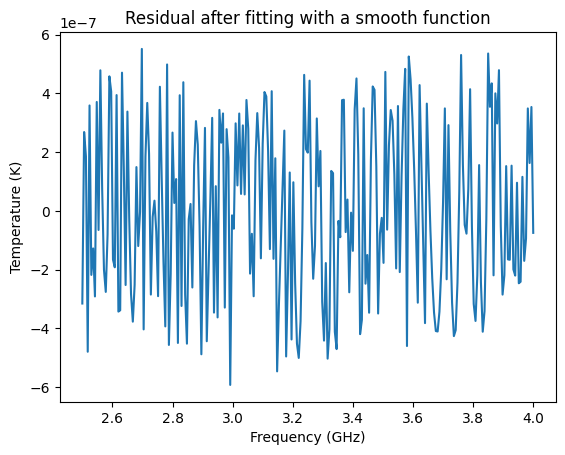

251
251
()


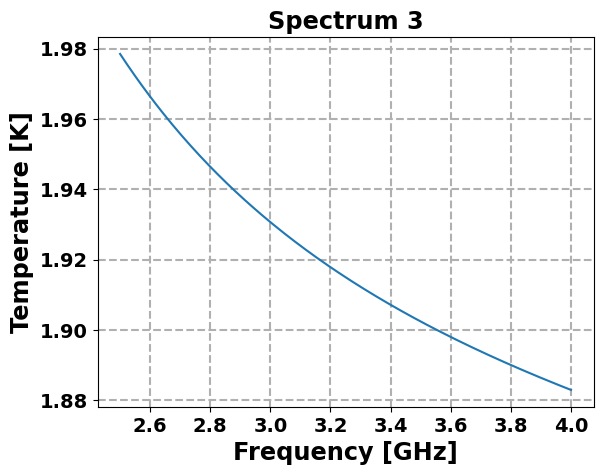

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  0.00011906262000832816
1.9643243138502566 -1.1316197476626009 -3.730833554976133
 
 
chisq2 =  2.2967183230651936e-05
1.9687795172451796 -1.160962394531822 -3.8024203403022083 -3.112665059698054
 
Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 515
         Function evaluations: 962
 
chisq3 =  3.1298040226241376e-06
1.9709170431884009 -1.1741142548170593 -3.9846277683917926 -2.33999149209518 -12.074550419491231
 
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 733
         Function evaluations: 1325
 
chisq4 =  7.804213338275817e-07
1.9716406607375583 -1.178902818187102 -4.015175046285197 -3.0508572850305766 -6.912889392299833 -31.07607757485458
 
 
chisq5 =  3.477379929610848e-07
1.972057009037641 -1.1816267108686396 -4.044126202872441 -2.9933284973145433 -11.430143543131985 -1.5600567708293185e

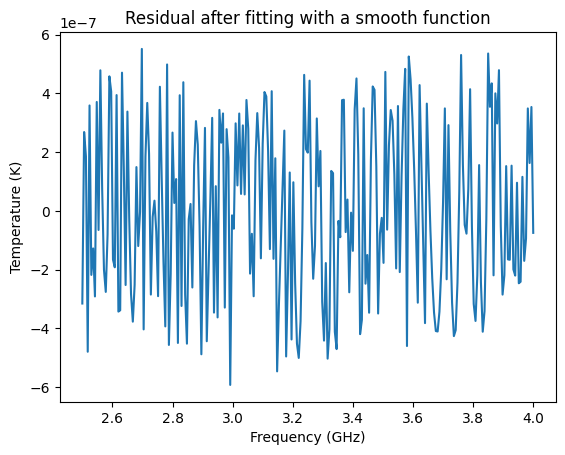

251
251
()


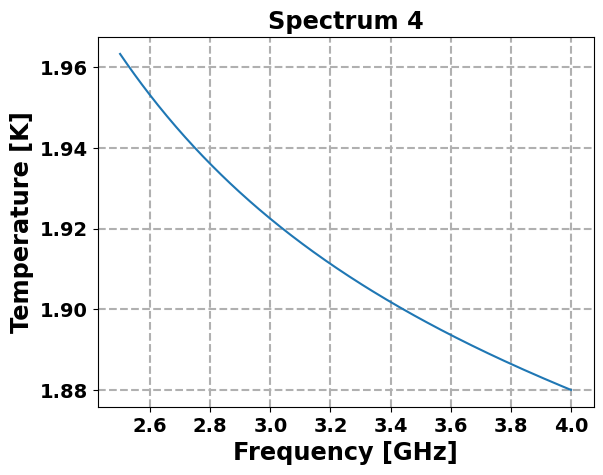

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  0.00013104106511619155
1.964612681409961 -1.2335972741425059 -3.8645139149368184
 
 
chisq2 =  2.358984381552358e-05
1.9686608979908975 -1.268087255054441 -3.9127537825360377 -4.239514498924576
 
 
chisq3 =  4.363497572980688e-06
1.970195852975928 -1.2799624697510583 -4.107326687012737 -3.0178051354332243 -15.24450773958052
 
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 731
         Function evaluations: 1342
 
chisq4 =  9.294221561104839e-07
1.9708275666453896 -1.2853491962158192 -4.133835626569841 -4.174917612281258 -5.355634670708181 -54.1311903394396
 
 
chisq5 =  3.587615751259169e-07
1.9711186493292523 -1.287769823480127 -4.1633384346221245 -3.9743885863998973 -12.697441171742124 -1.413719746016364e-08 -190.90409223079317
 
 
chisq6 =  3.3523259624880207e-07
1.9711851047356173 -1.2883262320487485 -4.169507525531427 -3.9702644004076775 -13.3

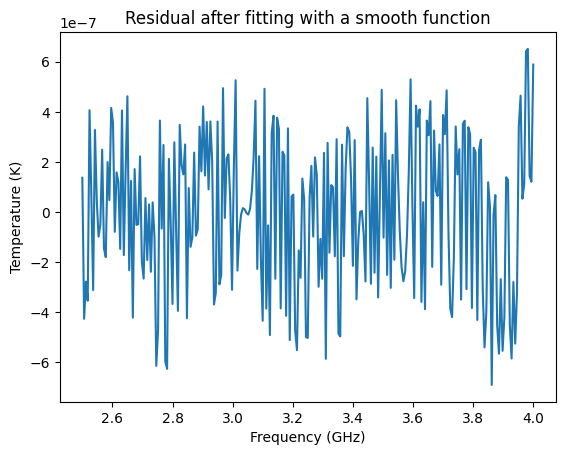

[[-3.1522240062642481e-07  2.6841353850670657e-07  1.8523788236635141e-07
  ...  1.6298394611702349e-07  3.5358217087555488e-07
  -7.4765899915618661e-08]
 [-3.1522240062642481e-07  2.6841353850670657e-07  1.8523788236635141e-07
  ...  1.6298394611702349e-07  3.5358217087555488e-07
  -7.4765899915618661e-08]
 [-3.1522240062642481e-07  2.6841353850670657e-07  1.8523788236635141e-07
  ...  1.6298394611702349e-07  3.5358217087555488e-07
  -7.4765899915618661e-08]
 [ 1.3632170725585979e-07 -4.2719116866152262e-07 -2.7874073738054506e-07
  ...  1.4289847283244228e-07  1.2064805177125493e-07
   5.8879032160952249e-07]]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Assuming x0, spectra_list, and freqs are defined elsewhere in your code
residuals = []  # Initialize the residuals list

for i in range(4):
    # Assuming x0 and spectra are defined elsewhere in your code
    x1 = x0
    x1log = np.log10(x1)
    print(x1log.size)
    
    # Ensure spectra_list[i] is a numpy array
    y1 = np.array(spectrum_11[i])
    print(y1.size)
    
    # Option 1: Fit the spectrum directly (without beam correction)
    # Uncomment if needed
    # y1log = np.log10(y1)
    
    # Option 2: Correct for the S11, by fitting the gamma value and correcting the spectrum
    # Uncomment the following lines if beam correction is needed
    # gamma_val_for_freqs = gamma_func(freqs)
    # p = np.polyfit(freqs, 1 - np.power(gamma_val_for_freqs, 2), 50)
    # gamma_val_fit = np.polyval(p, freqs) 
    # for ii in range(0, 12):  # Averaging spectrum over 12 spectra
    #     y1 = np.divide(spectra[0], gamma_val_fit)
    
    # Check if y1 is not empty
    if y1.size == 0:
        print("Error: y1 array is empty.")
    else:
        y1ave = np.average(y1, axis=0)
        print(y1ave.shape)
    
        # Ensure y1ave is used if averaging is done
        plt.plot(frequencies, y1 if 'y1ave' in locals() else y1)
        plt.xlabel('Frequency [GHz]', fontsize='xx-large', fontweight='bold')
        plt.ylabel('Temperature [K]', fontsize='xx-large', fontweight='bold')
        plt.title(f'Spectrum {i + 1}', fontsize='xx-large', fontweight='bold')
        plt.xticks(fontsize=14, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')
        plt.grid(linewidth=1.5, linestyle='--')
        plt.show()
    
        # Ensure non-negative values for logarithm
        if np.any(y1 <= 0):
            print("Error: y1 contains non-positive values, cannot compute log10.")
        else:
            y1log = np.log10(y1)
            print(y1log.shape)
            print('Check if the graph plotted looks smooth if beam correction is done')
    
            p12 = np.poly1d(np.polyfit(x1log, y1log, 10))
            yfit_poly = p12(x1log)
            yres_poly = (10.0**yfit_poly) - y1
    
            # Initial guess for optimization
            p00 = [np.log10(3.0), 1.0, -2.5]
            
            p1 = fmin(chisq1, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            current_chisq = chisq1(p1, x1, y1)
            print(" ")
            print("chisq1 = ", current_chisq)
            print(10.0**p1[0], p1[1], p1[2])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], 0.0]
            p1 = fmin(chisq2, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq2(p1, x1, y1)
            print(" ")
            print("chisq2 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], 0.0]
            p1 = fmin(chisq3, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq3(p1, x1, y1)
            print(" ")
            print("chisq3 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], 0.0]
            p1 = fmin(chisq4, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq4(p1, x1, y1)
            print(" ")
            print("chisq4 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], 0.0]
            p1 = fmin(chisq5, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq5(p1, x1, y1)
            print(" ")
            print("chisq5 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], 0.0]
            p1 = fmin(chisq6, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq6(p1, x1, y1)
            print(" ")
            print("chisq6 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], 0.0]
            p1 = fmin(chisq7, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq7(p1, x1, y1)
            print(" ")
            print("chisq7 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], 0.0]
            p1 = fmin(chisq8, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq8(p1, x1, y1)
            print(" ")
            print("chisq8 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9])
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], 0.0]
            p1 = fmin(chisq9, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq9(p1, x1, y1)
            print(" ")
            print("chisq9 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], p1[10])
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], p1[10], 0.0]
            p1 = fmin(chisq10, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq10(p1, x1, y1)
            print(" ")
            print("chisq10 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], p1[10], p1[11])
            print(" ")
    
            yfit = func10(p1, x1)
            yres = y1 - yfit
            residuals.append(yres)
            
            # Plotting the residuals
            sp1 = y1 - yfit
            sp1 = sp1.flatten()
            sp2 = sp1 * 1e+7
            sp2 = np.array(sp2)

            np.savetxt(f'/Users/hshishir/Desktop/mcmc_fit/sp3/sp3_ideal_jones{i}.txt', sp2)
            
            plt.plot(frequencies, sp1)
            plt.ylabel('Temperature (K)')
            plt.xlabel('Frequency (GHz)')
            plt.title('Residual after fitting with a smooth function')
            plt.show()

residuals = np.asarray(residuals)
print(residuals)


File: sp3_ideal_jones3.txt
Amplitude=0.901178684372351, Angular freq.=384.56947158561553, phase=2.4374909756833585, Max. Cov.=5.070790402635163


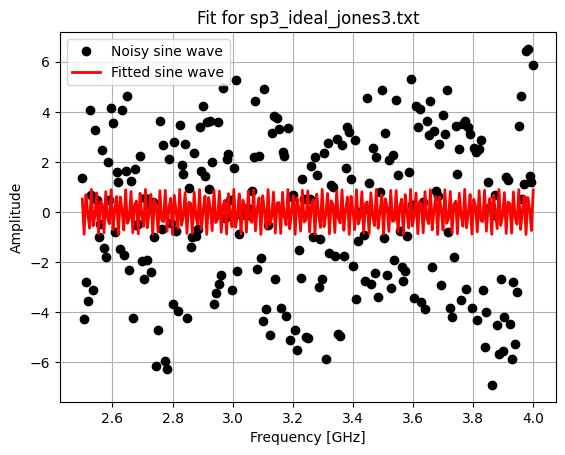

File: sp3_ideal_jones2.txt
Amplitude=-0.7383760587751249, Angular freq.=49.388512117069496, phase=1.63971777768121, Max. Cov.=6.813917474585021


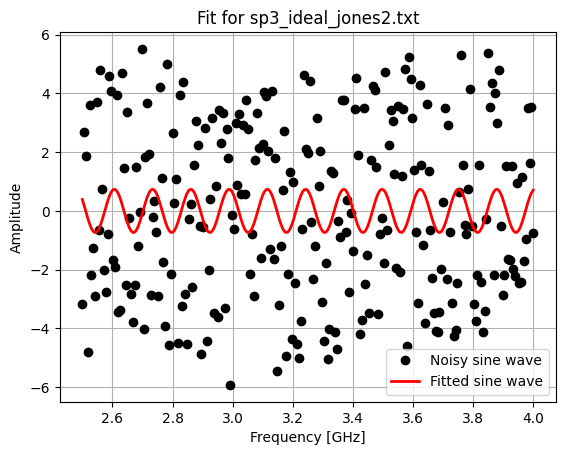

File: sp3_ideal_jones0.txt
Amplitude=-0.7383760587751249, Angular freq.=49.388512117069496, phase=1.63971777768121, Max. Cov.=6.813917474585021


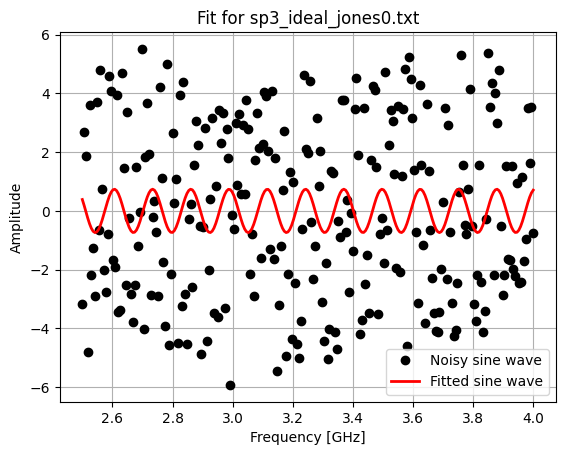

File: sp3_ideal_jones1.txt
Amplitude=-0.7383760587751249, Angular freq.=49.388512117069496, phase=1.63971777768121, Max. Cov.=6.813917474585021


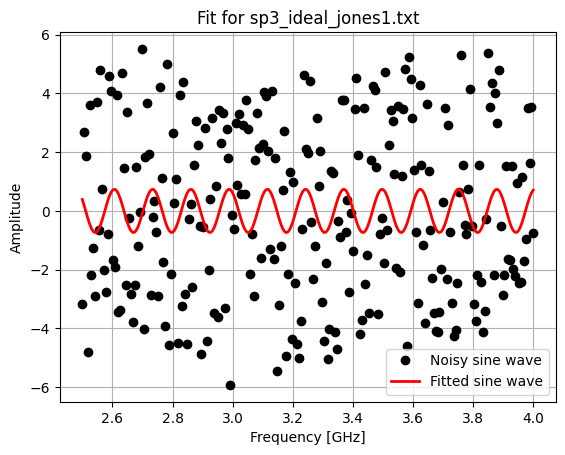

In [85]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import os

def fit_sin(tt, yy):
    '''Fit sine wave to the input time sequence, and return fitting parameters.'''
    tt = np.array(tt)
    yy = np.array(yy)
    
    # Calculate the FFT of the input data
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    
    # Initial guess for the fitting parameters
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # Exclude the zero frequency "peak"
    guess_amp = np.std(yy) * 2.**0.5
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0.]) # Initial guess for amplitude, angular frequency, and phase

    # Define the sine function to fit
    def sinfunc(t, A, w, p):
        return A * np.sin(w*t + p)

    # Perform the curve fitting
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p = popt
    f = w/(2.*np.pi)

    if p % (2 * np.pi) != 0:
        p = p % (2 * np.pi)
        p = np.mod(p, 2 * np.pi)
    
    # Define the fitted function
    fitfunc = lambda t: A * np.sin(w*t + p)
    
    # Return fitting parameters and fit function
    return {"amp": A, "omega": w, "phase": p, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess, popt, pcov)}

# Path to the directory containing the files
directory = '/Users/hshishir/Desktop/mcmc_fit/sp3/'

# List of filenames in the directory
files = [f for f in os.listdir(directory) if f.startswith('sp3_ideal_jones') and f.endswith('.txt')]

# Iterate over each file, perform the fit, and plot the results
for file in files:
    # Read the data from the file
    filepath = os.path.join(directory, file)
    data = np.loadtxt(filepath)
    
    y_noise = data

    # Fit the noisy sine wave
    res = fit_sin(frequencies, y_noise)

    # Print the fitting results
    print(f"File: {file}")
    print("Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, Max. Cov.=%(maxcov)s" % res)

    # Plot the original sine wave, noisy data, and fitted curve
    plt.figure()
    plt.plot(frequencies, y_noise, "ok", label="Noisy sine wave")
    plt.plot(frequencies, res["fitfunc"](frequencies), "r-", label="Fitted sine wave", linewidth=2)
    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Amplitude')
    plt.title(f'Fit for {file}')
    plt.legend(loc="best")
    plt.grid()
    plt.show()


File: sp3_ideal_jones3.txt
Amplitude = 0.901178684372351
Omega = 61.206132365088905
Phase = 2.4374909756833585
Phase in deg = 139.66823290665644


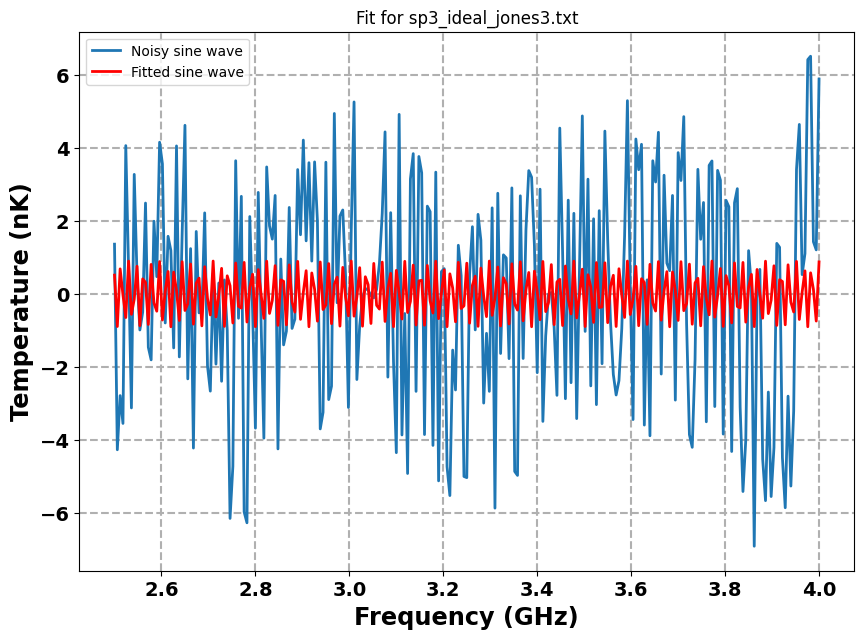

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp3/fit_sp3_ideal_jones3.txt
File: sp3_ideal_jones2.txt
Amplitude = -0.7383760587751249
Omega = 7.860425835385579
Phase = 1.63971777768121
Phase in deg = 93.95582866113332


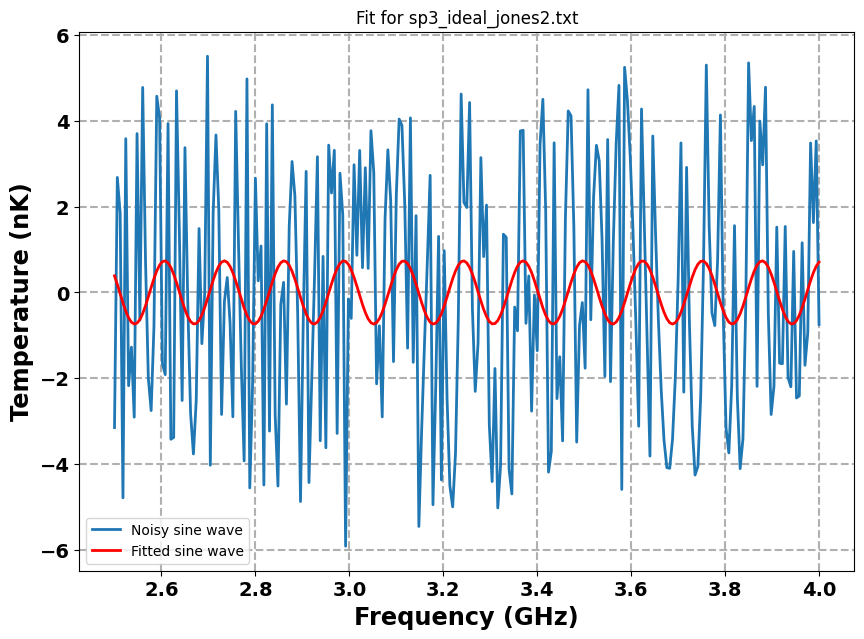

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp3/fit_sp3_ideal_jones2.txt
File: sp3_ideal_jones0.txt
Amplitude = -0.7383760587751249
Omega = 7.860425835385579
Phase = 1.63971777768121
Phase in deg = 93.95582866113332


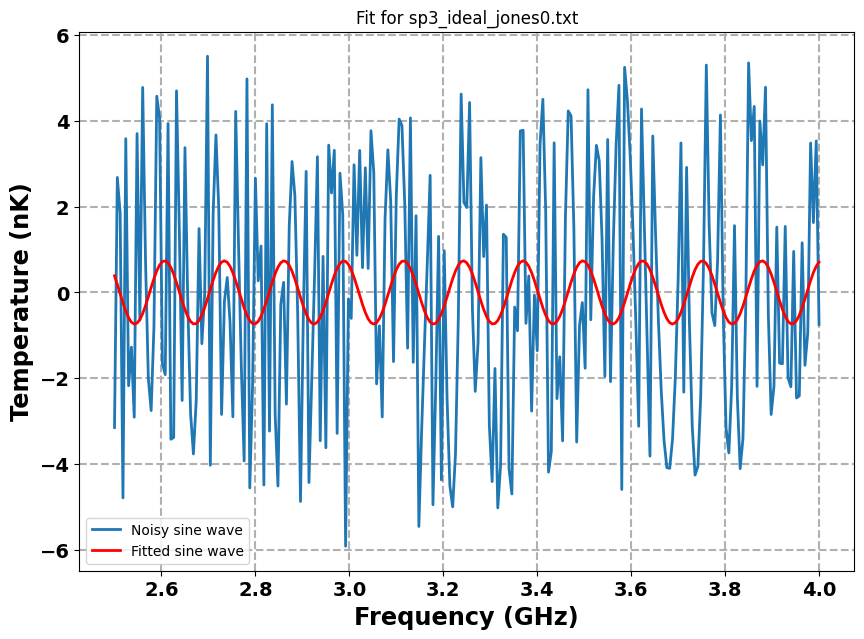

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp3/fit_sp3_ideal_jones0.txt
File: sp3_ideal_jones1.txt
Amplitude = -0.7383760587751249
Omega = 7.860425835385579
Phase = 1.63971777768121
Phase in deg = 93.95582866113332


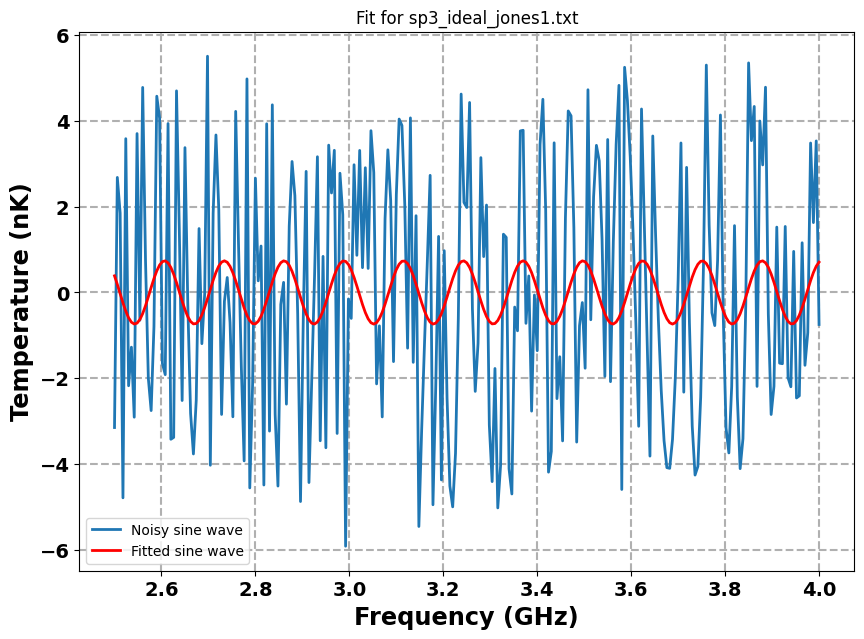

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp3/fit_sp3_ideal_jones1.txt


In [86]:
directory = '/Users/hshishir/Desktop/mcmc_fit/sp3/'

# List of filenames in the directory
files = [f for f in os.listdir(directory) if f.startswith('sp3_ideal_jones') and f.endswith('.txt')]

# Iterate over each file, perform the fit, plot the results, and save the fitted data
for file in files:
    # Read the data from the file
    filepath = os.path.join(directory, file)
    data = np.loadtxt(filepath)
    
    y_noise = data

    # Fit the noisy sine wave
    res = fit_sin(frequencies, y_noise)

    # Extract fitting parameters
    amplitude = res["amp"]
    omega = res["omega"] / (2 * np.pi)
    phase = res["phase"]
    phase_deg = phase * 57.3

    # Print the fitting results
    print(f"File: {file}")
    print("Amplitude =", amplitude)
    print("Omega =", omega)
    print("Phase =", phase)
    print("Phase in deg =", phase_deg)

    # Plot the noisy data and fitted sine wave
    plt.figure(figsize=(10, 7))
    plt.plot(frequencies, y_noise, label="Noisy sine wave", linewidth=2.0)
    plt.plot(frequencies, amplitude * np.sin(2 * np.pi * frequencies * omega + phase), "r-", label="Fitted sine wave", linewidth=2)
    plt.ylabel('Temperature (nK)', fontsize='xx-large', fontweight='bold')
    plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.grid(linewidth=1.5, linestyle='--')
    plt.legend(loc="best")
    plt.title(f'Fit for {file}')
    plt.show()

    # Save the fitted sine wave data to a new text file
    fitted_data = amplitude * np.sin(2 * np.pi * frequencies * omega + phase)
    output_filepath = os.path.join(directory, f"fit_{file}")
    np.savetxt(output_filepath, fitted_data)
    print(f"Fitted data saved to {output_filepath}")


Running burn-in...
Running production...


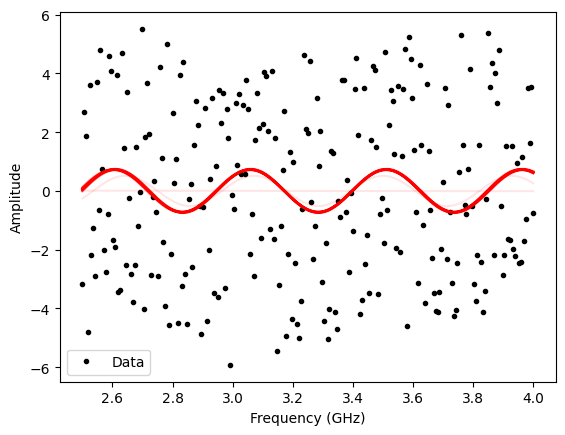

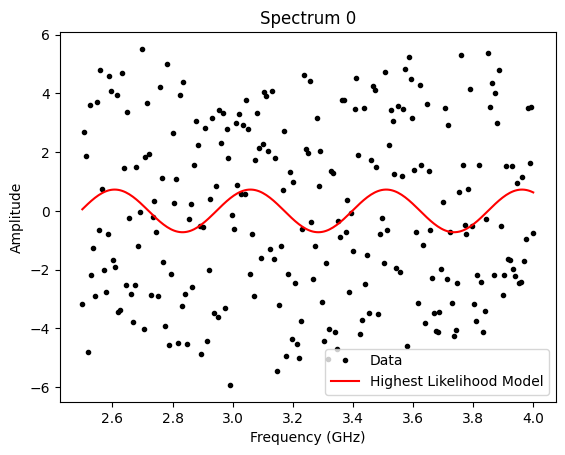

Theta max for spectrum 0: [0.7257052158606564 2.214077197347978  2.9958409581479994]


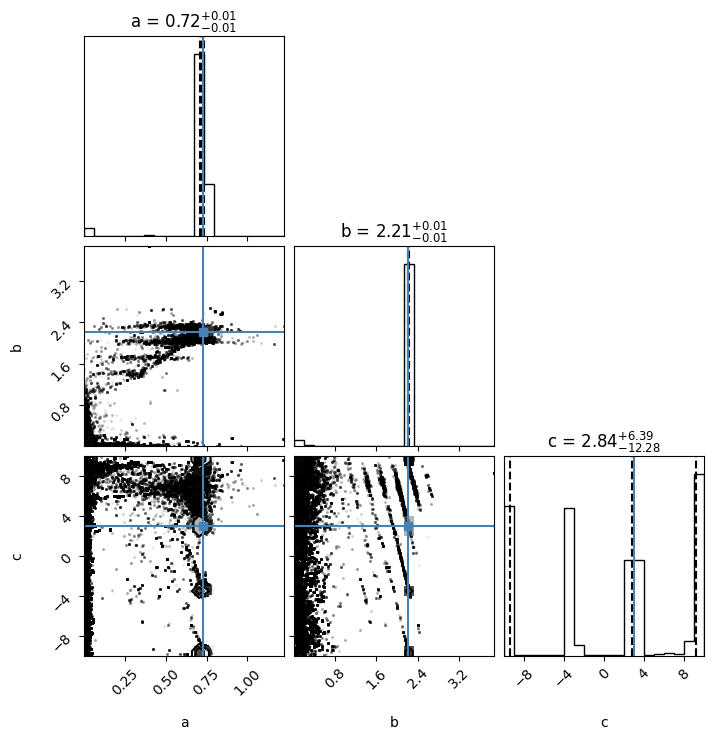

a=0.72^{+0.01}_{-0.01}
b=2.21^{+0.01}_{-0.01}
c=2.84^{+6.39}_{-12.28}


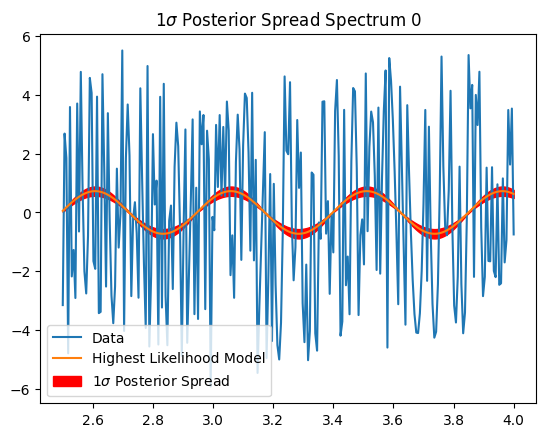

Running burn-in...
Running production...


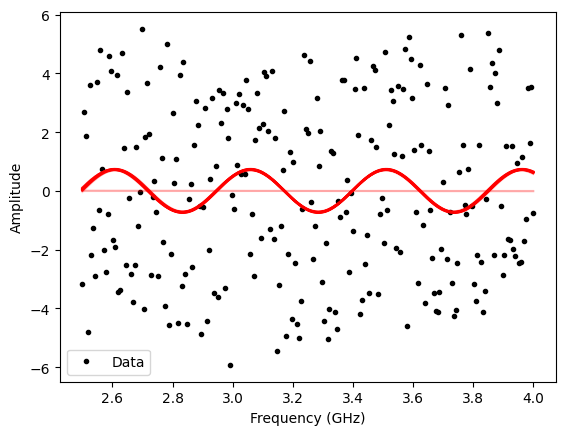

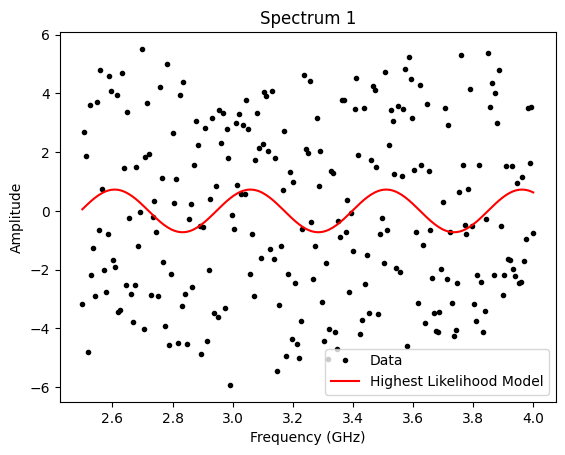

Theta max for spectrum 1: [ 0.7255001253282443  2.214206832915679  -9.57310085771817  ]


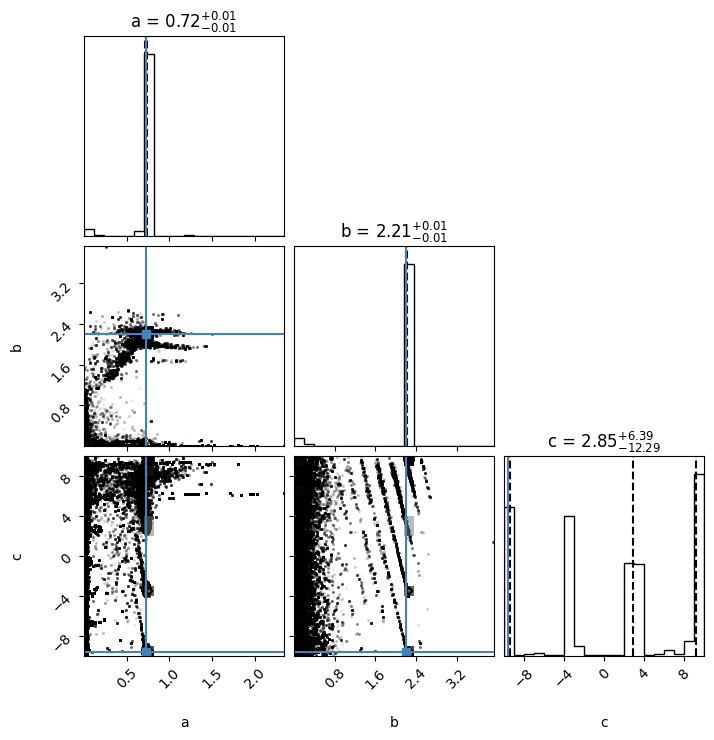

a=0.72^{+0.01}_{-0.01}
b=2.21^{+0.01}_{-0.01}
c=2.85^{+6.39}_{-12.29}


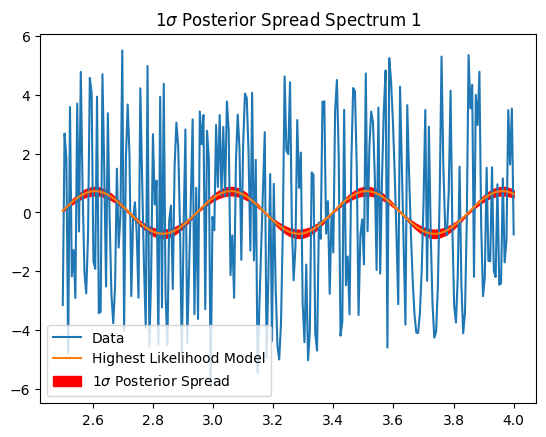

Running burn-in...
Running production...


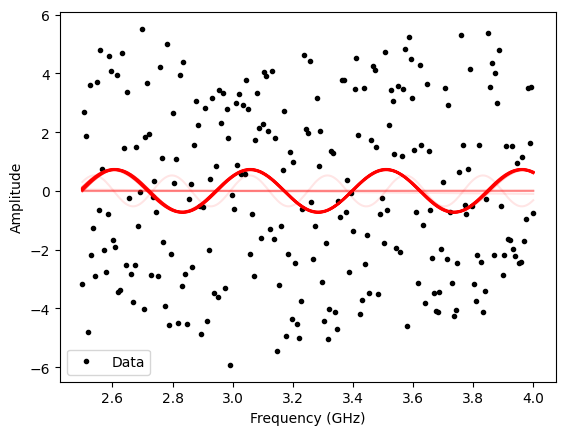

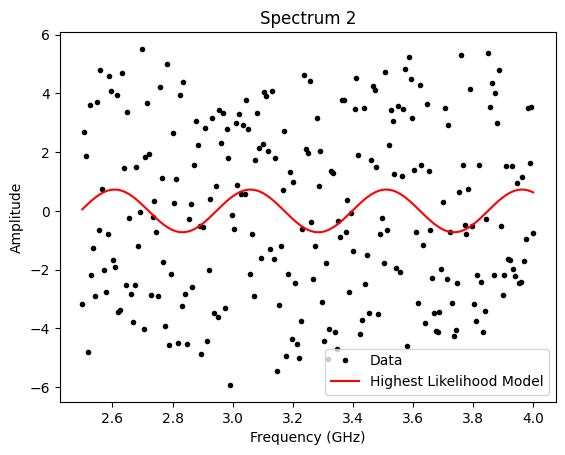

Theta max for spectrum 2: [0.7255637600176088 2.2142102475967196 2.9935240805576724]


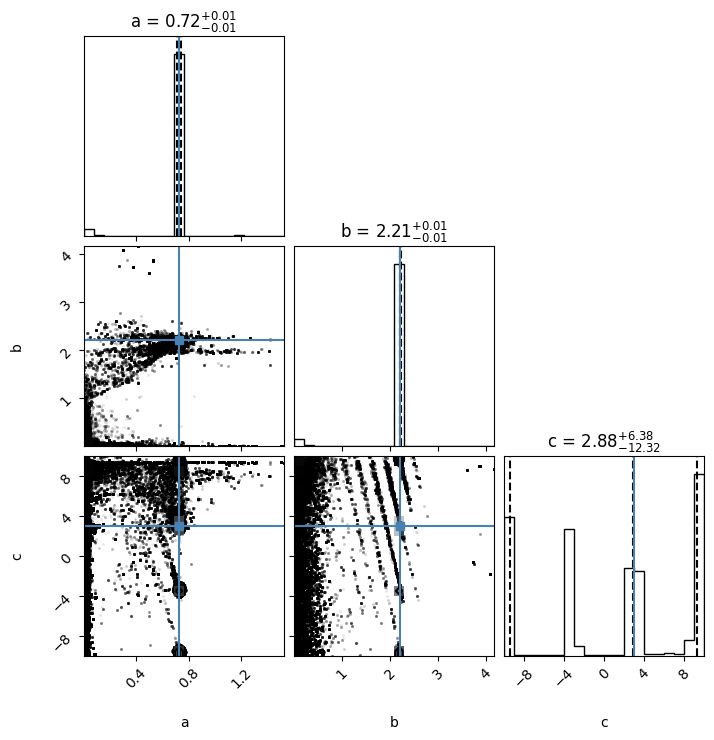

a=0.72^{+0.01}_{-0.01}
b=2.21^{+0.01}_{-0.01}
c=2.88^{+6.38}_{-12.32}


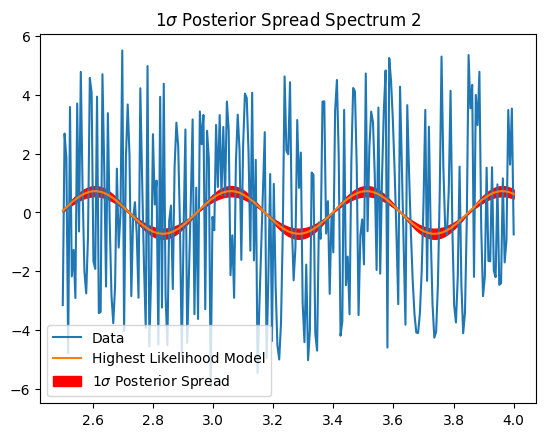

Running burn-in...
Running production...


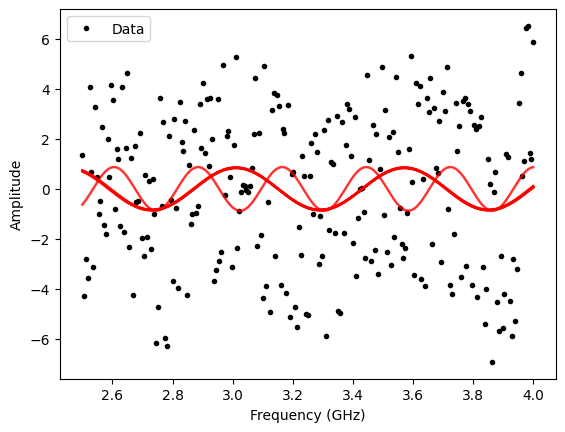

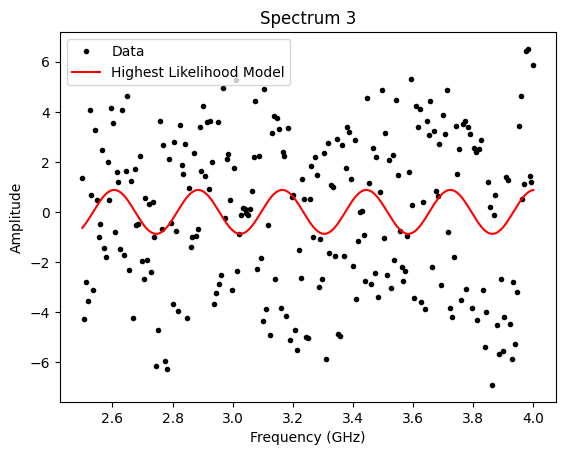

Theta max for spectrum 3: [0.877596758035847  3.5763956880758787 5.844513065496722 ]


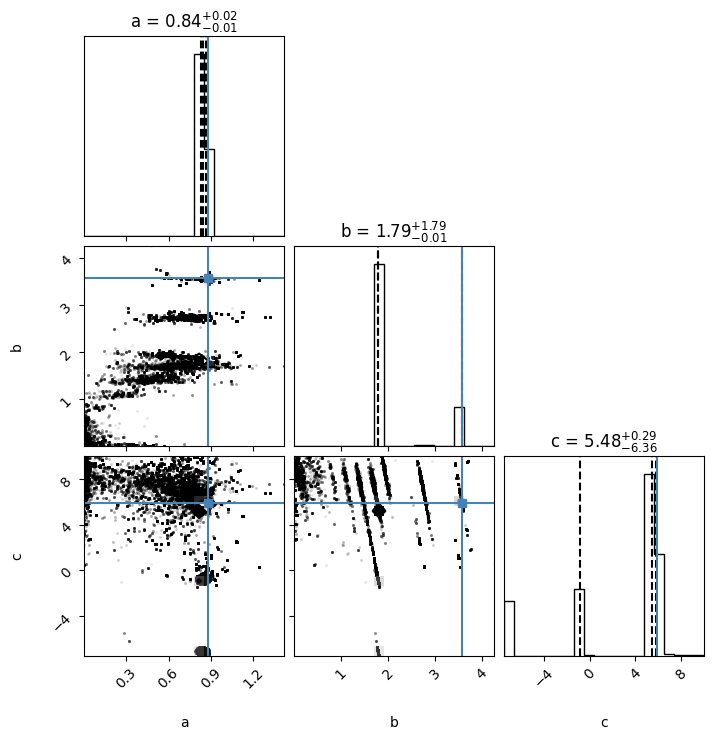

a=0.84^{+0.02}_{-0.01}
b=1.79^{+1.79}_{-0.01}
c=5.48^{+0.29}_{-6.36}


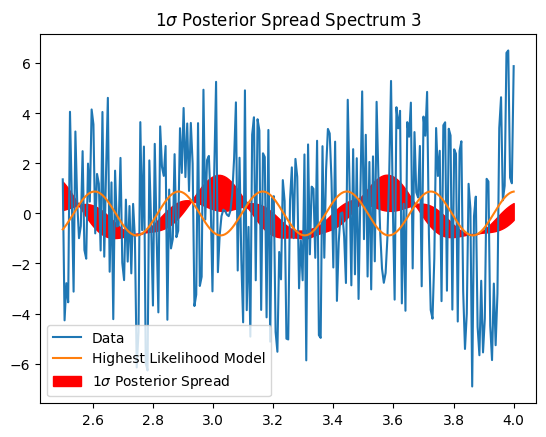

In [90]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

# Assuming `StraightLineIntrinsicScatterModel` and `line_model` are already defined

def lnprob(theta, x, y, y_err):
    scatter_model = StraightLineIntrinsicScatterModel(x, y, y_err)
    return scatter_model.ln_posterior(theta)

def main(p0, nwalkers, niter, ndim, lnprob, data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)
    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()
    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)
    return sampler, pos, prob, state

def plotter(sampler, x, y):
    plt.ion()
    plt.plot(x, y, 'k.', label='Data')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(x, line_model(theta, x), color="r", alpha=0.1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def sample_walkers(nsamples, flattened_chain):
    models = []
    draw = np.floor(np.random.uniform(0, len(flattened_chain), size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    for i in thetas:
        mod = line_model(i, frequencies)
        models.append(mod)
    spread = np.std(models, axis=0)
    med_model = np.median(models, axis=0)
    return med_model, spread

for i in range(4):
    # Load the y data and y_err data
    y = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sp3/sp3_ideal_jones{i}.txt')
    y_err = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array_3/sigma_array_spectra{i}.txt')
    
    nwalkers = 250
    niter = 20000
    initial = np.array([1.0, 1.0, 8.0])
    ndim = len(initial)
    p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

    # Perform MCMC sampling
    data = (frequencies, y, y_err)
    sampler, pos, prob, state = main(p0, nwalkers, niter, ndim, lnprob, data)

    # Plot the results
    plotter(sampler, frequencies, y)

    samples = sampler.flatchain
    theta_max = samples[np.argmax(sampler.flatlnprobability)]

    # Adjust theta_max if necessary
    if theta_max[0] < 0:
        theta_max[0] = np.abs(theta_max[0])
        theta_max[2] = theta_max[2] - np.pi
        if theta_max[2] % (2 * np.pi) != 0:
            ee = np.floor(theta_max[2] / (2 * np.pi))
            theta_max[2] = theta_max[2] - (ee * 2 * np.pi)

    best_fit_model = line_model(theta_max, frequencies)

    plt.figure()
    plt.plot(frequencies, y, 'k.', label='Data')
    plt.plot(frequencies, best_fit_model, label='Highest Likelihood Model', color='r')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title(f'Spectrum {i}')
    plt.show()
    print(f'Theta max for spectrum {i}:', theta_max)

    labels = ['a', 'b', 'c']
    fig = corner.corner(samples, show_titles=True, labels=labels, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84], truths=theta_max)
    plt.show()

    # Calculate and print parameter uncertainties
    quantiles = np.percentile(samples, [16, 50, 84], axis=0)
    medians = quantiles[1]
    lower_errors = medians - quantiles[0]
    upper_errors = quantiles[2] - medians

    for j, label in enumerate(labels):
        print(f"{label}={medians[j]:.2f}^{{+{upper_errors[j]:.2f}}}_{{-{lower_errors[j]:.2f}}}")

    # Sample walkers and plot the spread
    med_model, spread = sample_walkers(100, samples)

    plt.plot(frequencies, y, label='Data')
    plt.plot(frequencies, best_fit_model, label='Highest Likelihood Model')
    plt.fill_between(frequencies, med_model - spread, med_model + spread, color='red', alpha=1, label=r'$1\sigma$ Posterior Spread')
    plt.title(f'$1\sigma$ Posterior Spread Spectrum {i}')
    plt.legend()
    plt.show()

### 